<a href="https://colab.research.google.com/github/Decadent-tech/Home-Loan-Defaulters-/blob/main/Hoam_Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Loan Default Prediction**
With the help of machine learning, it is possible to predict the chances of a person whether they would pay the loan back or not. Therefore, one would be able to understand and use different machine learning models to understand the behavior of the user and whether there is a possibility to pay back the loan. Using different machine learning models, we are going to be predicting the chances of a person paying back the loan respectively.

The output that we are going to be predicting whether a person would pay the loan back or not is a discrete variable. We are going to be using different machine learning models and understand the behaviour of different customers. In addition to this, we are going to be importing various libraries that are important for machine learning. We see that there are different libraries that could be used for deploying machine learning and deep learning models.

We first start the project by importing various libraries that are important for data visualization purposes respectively. There are different machine learning models that we are going to be using in order to get the predictions. We see that there are some machine learning models that are important.

We are now going to be dividing the data into training and test set.

In [ ]:
!pip install imblearn

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import gc
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

# **Reading the Train and Test dataframe**

In [ ]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
gc.collect()

6

In [ ]:
print("The type of data that is present based on different features is:")
df_train.dtypes.value_counts()

The type of data that is present based on different features is:


,count
float64,65
int64,41
object,16


In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


**Barplot of Type Suite**

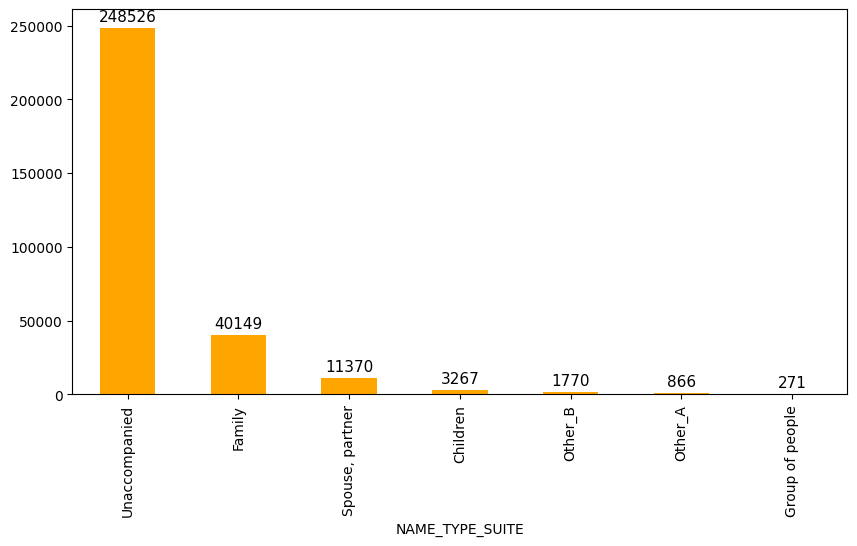

In [ ]:
plt.figure(figsize = (10, 5))
plots = df_train['NAME_TYPE_SUITE'].value_counts().plot(kind = 'bar', color = 'orange')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Counting cases for Defaulter and Non - Defaulters**

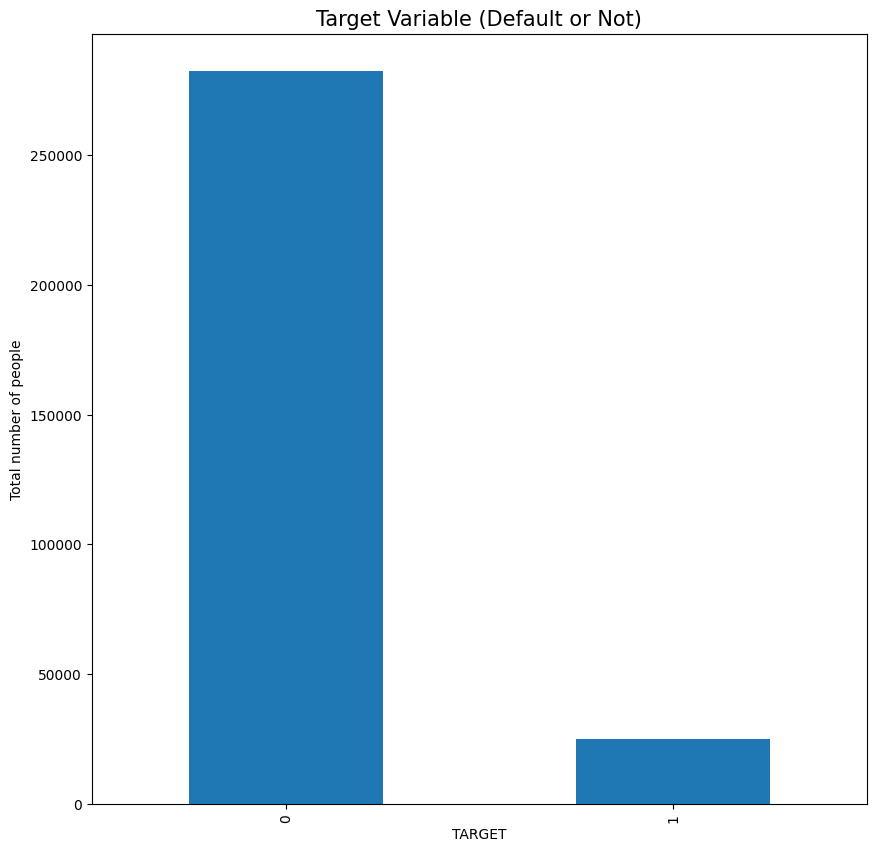

In [ ]:
plt.figure(figsize = (10, 10))
plt.title("Target Variable (Default or Not)", fontsize = 15)
plt.xlabel("Default or not")
plt.ylabel("Total number of people")
df_train['TARGET'].value_counts().plot(kind = 'bar')
plt.show()

Below we are going to be checking if there are NULL values present in our data. We see that there are quite a few null values present in our occupation type. Those values are printed below as can be seen.

In [ ]:
print("Are there any null values for the occupation type?\n")
if any(df_train['OCCUPATION_TYPE'].isnull()):
    print("Yes, there are null values for occupation type feature")
else:
    print("No, there are no null values for occupation type feature")

Are there any null values for the occupation type?

Yes, there are null values for occupation type feature


**Function to Calculate Null Percentage Values**

In [ ]:
def null_percent_values(data):
  null_values_total = data.isnull().sum().sort_values(ascending = False)
  total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
  return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [ ]:
null_percent_values(df_train[['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']])

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
NAME_HOUSING_TYPE,0,0.000000


In [ ]:
null_percent_values(df_train)[0: 30]

,Total,Percent
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


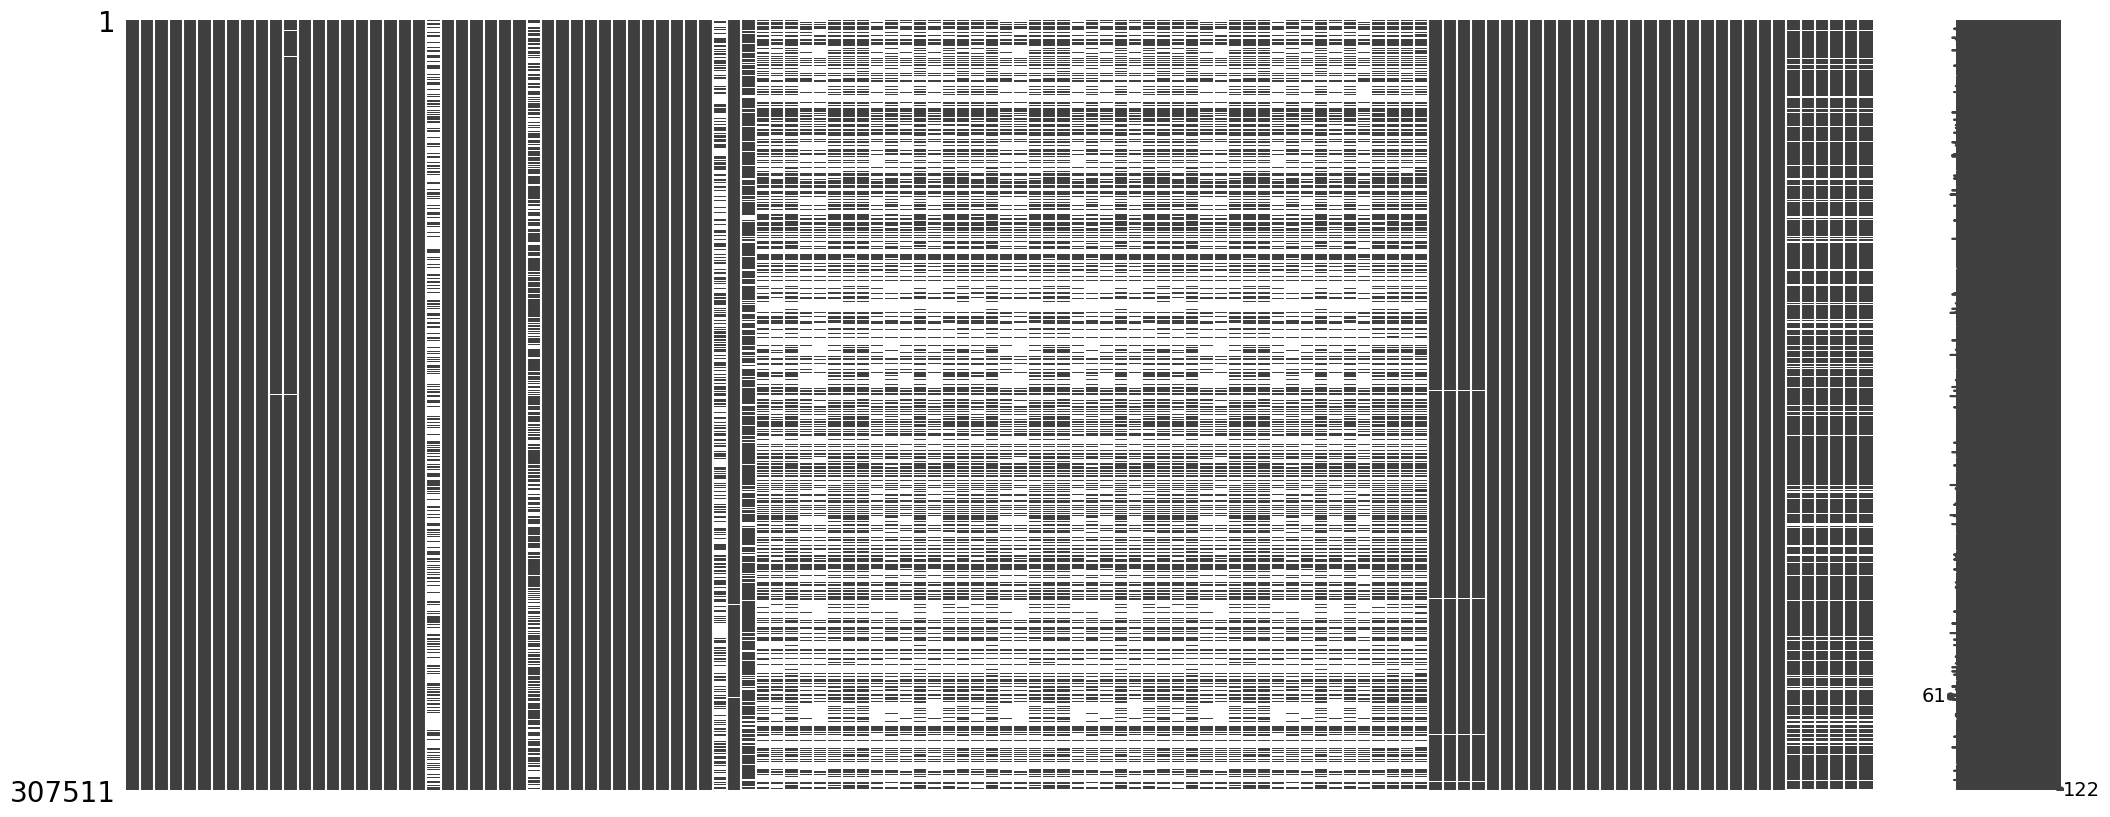

In [ ]:
msno.matrix(df_train)
plt.show()

In [ ]:
df_train.select_dtypes('float')['AMT_GOODS_PRICE']

,AMT_GOODS_PRICE
0,351000.0
1,1129500.0
2,135000.0
3,297000.0
4,513000.0
...,...
307506,225000.0
307507,225000.0
307508,585000.0
307509,319500.0


In [ ]:
len(df_train)

307511

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (48744, 121)


In [ ]:
df_train.select_dtypes('float').shape

(307511, 65)

In [ ]:
df_train.select_dtypes('float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [ ]:
null_percentage(df_train).iloc[0: 5]

,Total,Percent
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963


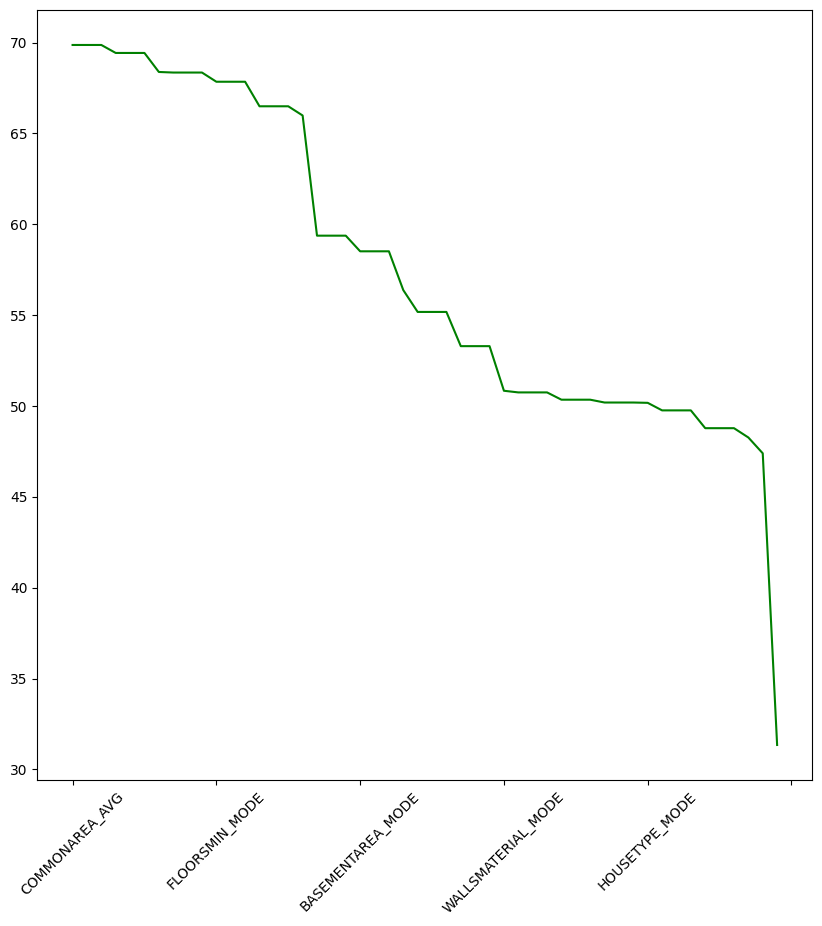

In [ ]:
plt.figure(figsize = (10, 10))
null_percentage(df_train).iloc[0: 50]['Percent'].plot(color = 'green')
plt.xticks(rotation = 45)
plt.show()

Taking a look at different features, we are going to be converting those values and removing features that contain more than 50 percent of NULL values respectively.

In [ ]:
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
null_percentage(df_train).iloc[0: 30]

,Total,Percent
FLOORSMAX_MEDI,153020,49.760822
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307


We are going to take the top 20 values that are important for machine learning predictions. Taking a look at the different values, we are going to count the number of missing values from the below cell.

In [ ]:
count = 0
for i in range(len(df_train)):
    if df_train.iloc[i].isnull()[0] == True:
        count = count + 1

In [ ]:
df_train.iloc[0].isnull()[0]

np.False_

Let us see the percentage of rows that were dropped if we remove features with at least one NULL value. Below, we see that the percentage of values dropped are quite high. Therefore, we cannot remove all the features that contain NULL values.

In [ ]:
Number_of_rows_dropped = df_train.shape[0] - df_train.dropna().shape[0]
print("The total number of rows dropped is {}".format(Number_of_rows_dropped))
print("The percentage of rows dropped is {}%".format(np.round(Number_of_rows_dropped / len(df_train) * 100, 3)))

The total number of rows dropped is 222936
The percentage of rows dropped is 72.497%


In [ ]:
df_train.shape

(307511, 81)

In [ ]:
df_train.dropna().shape

(84575, 81)

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False).iloc[0: 20]

,0
FLOORSMAX_MEDI,0.497608
FLOORSMAX_AVG,0.497608
FLOORSMAX_MODE,0.497608
YEARS_BEGINEXPLUATATION_AVG,0.487810
YEARS_BEGINEXPLUATATION_MEDI,0.487810
YEARS_BEGINEXPLUATATION_MODE,0.487810
TOTALAREA_MODE,0.482685
EMERGENCYSTATE_MODE,0.473983
OCCUPATION_TYPE,0.313455
EXT_SOURCE_3,0.198253


In [ ]:
df_train['FLOORSMAX_AVG']

,FLOORSMAX_AVG
0,0.0833
1,0.2917
2,NaN
3,NaN
4,NaN
...,...
307506,0.6042
307507,0.0833
307508,0.1667
307509,0.0417


Creating MEAN , MEDIAN , MODE Functions

In [ ]:
def mean_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    data.fillna(data.mean(), inplace = inplace)

def median_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    data.fillna(data.median(), inplace = inplace)

def mode_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    data.fillna(data.mode(), inplace = inplace)

In [ ]:
mean_imputation(df_train['FLOORSMAX_AVG'])

In [ ]:
df_train['FLOORSMAX_AVG'].isnull().sum()

np.int64(153020)

In [ ]:
df_train[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']]

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,1.0,0.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [ ]:
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

**Countplot of amt_req_credit_bureau_year**

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

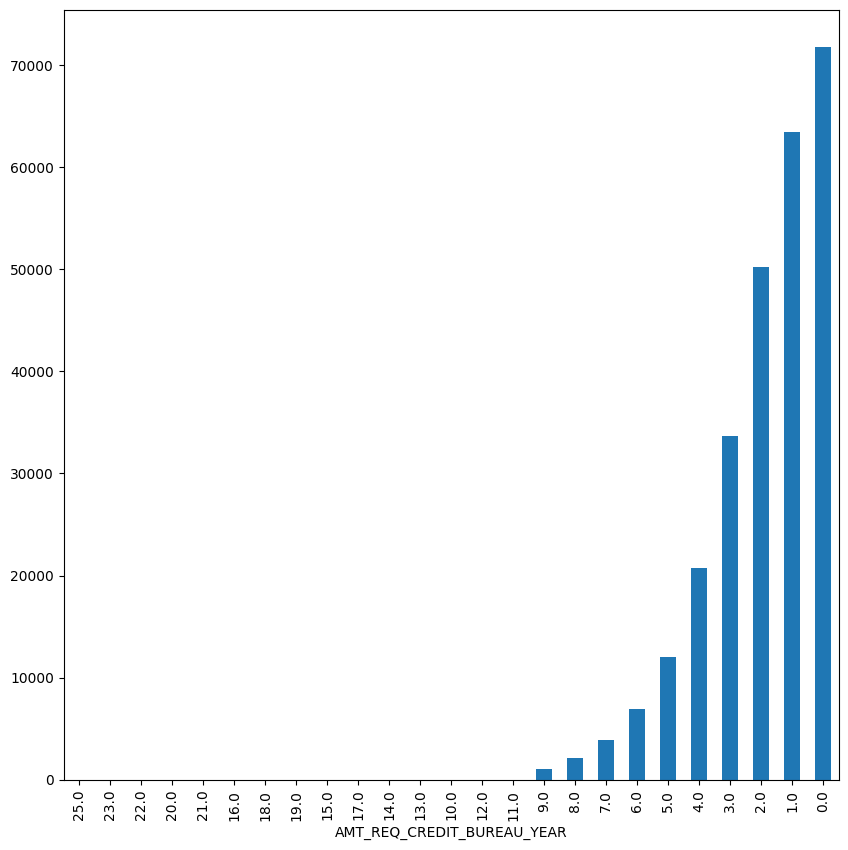

In [ ]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().sort_values(ascending = True).plot(kind = 'bar')

**Countplot of amt_req_credit_bureau_hour**

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

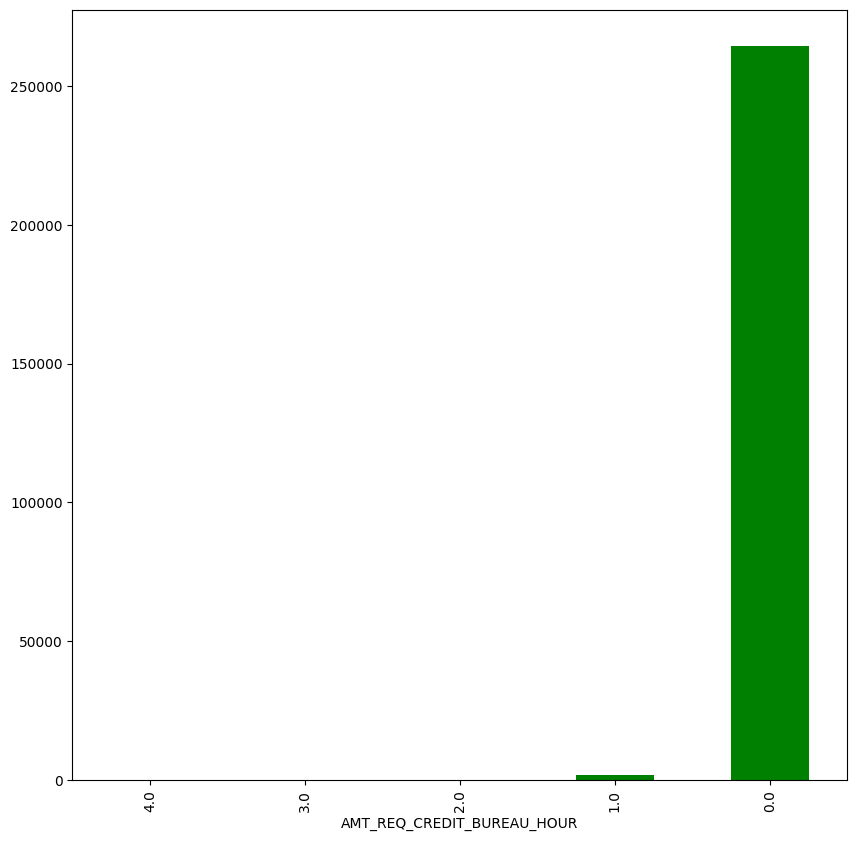

In [ ]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().sort_values(ascending = True).plot(kind = 'bar', color = 'green')

**Countplot of amt_req_credit_bureau_qrt**
It is now time to get a plot of amt_req_credit_bureau_qrt and get an understanding of the data.

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

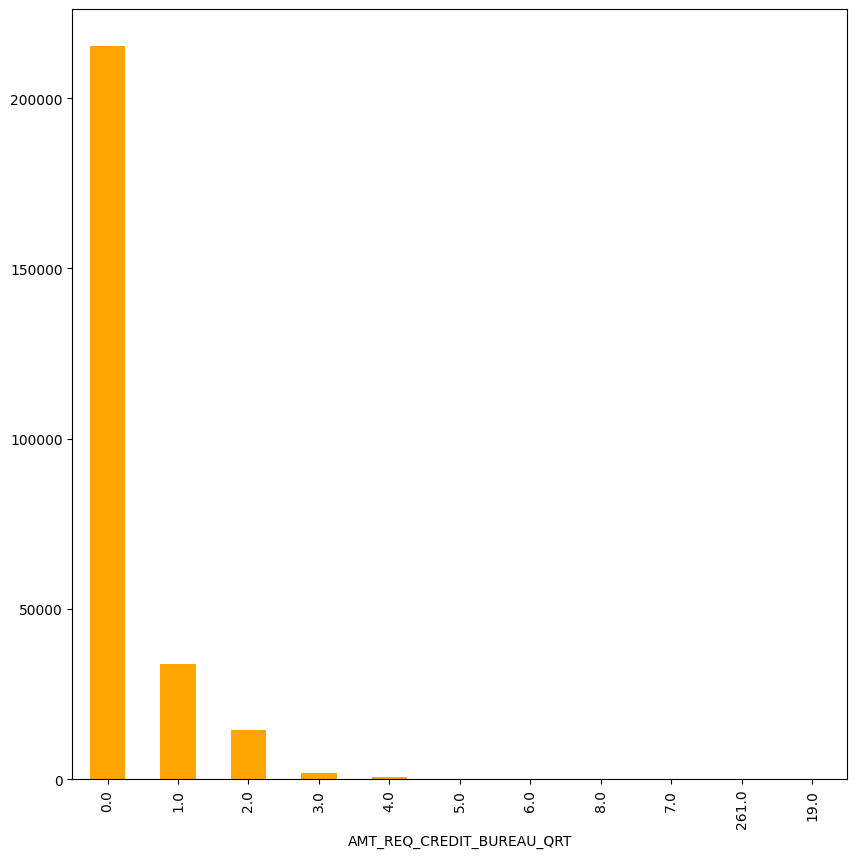

In [ ]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().plot(kind = 'bar', color = 'orange')

**Countplot of NAME_CONTRACT_TYPE**

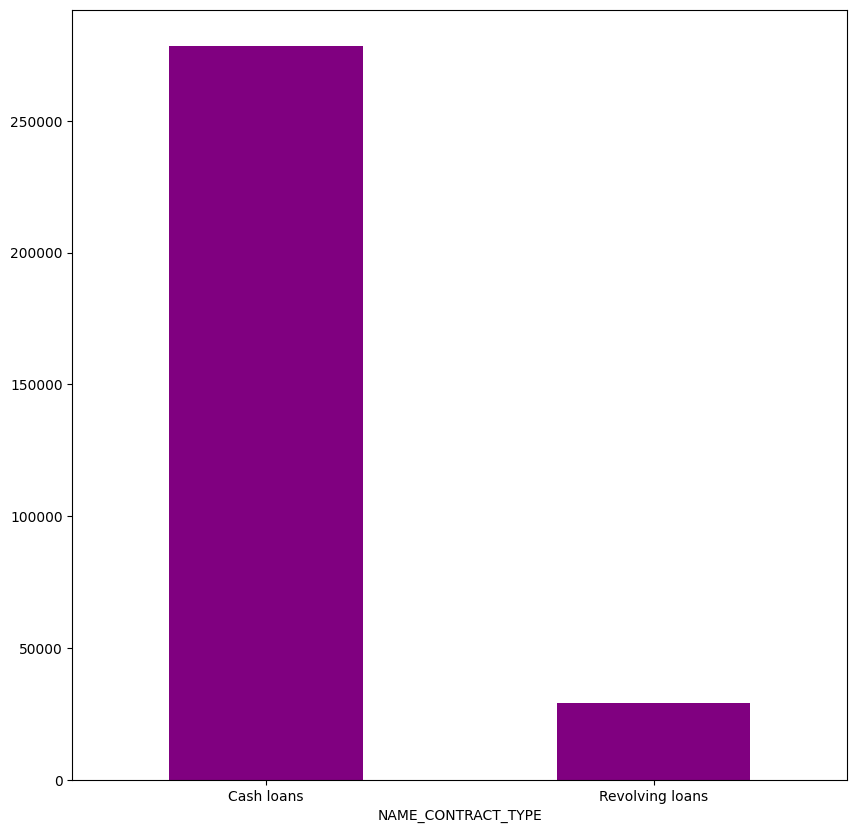

In [ ]:
plt.figure(figsize = (10, 10))
df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 0)
plt.show()

**Countplot of CODE_GENDER**

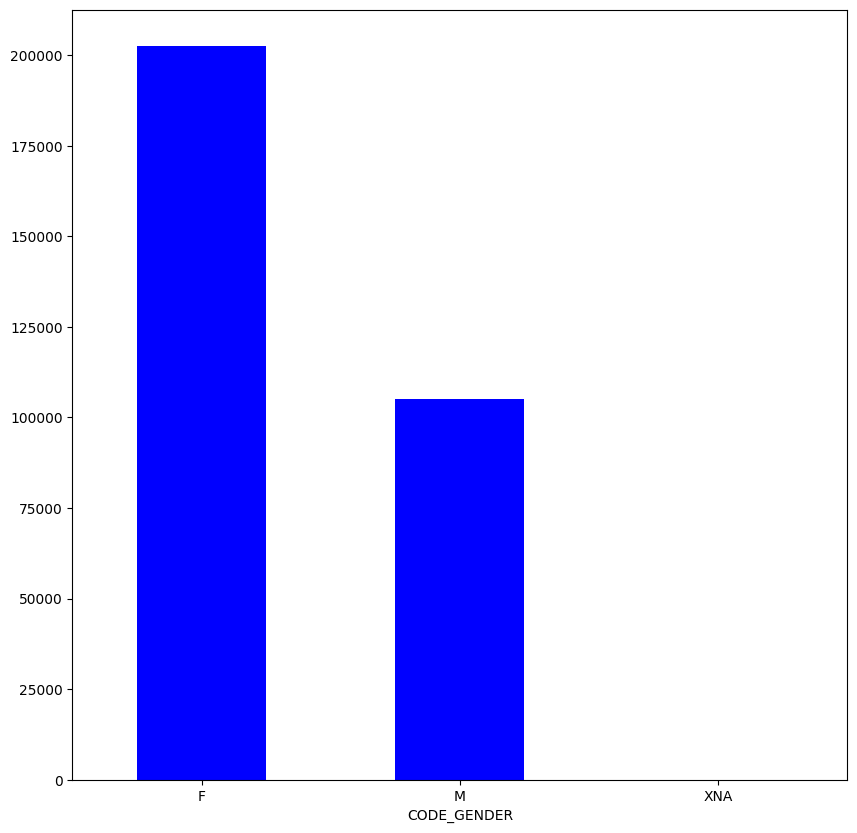

In [ ]:
plt.figure(figsize = (10, 10))
df_train['CODE_GENDER'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
len(df_train[df_train['CODE_GENDER'] == 'XNA'])

4

In [ ]:
df_train = df_train[df_train['CODE_GENDER'] != 'XNA']

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_train)

307507

**Countplot of FLAG_OWN_REALTY**

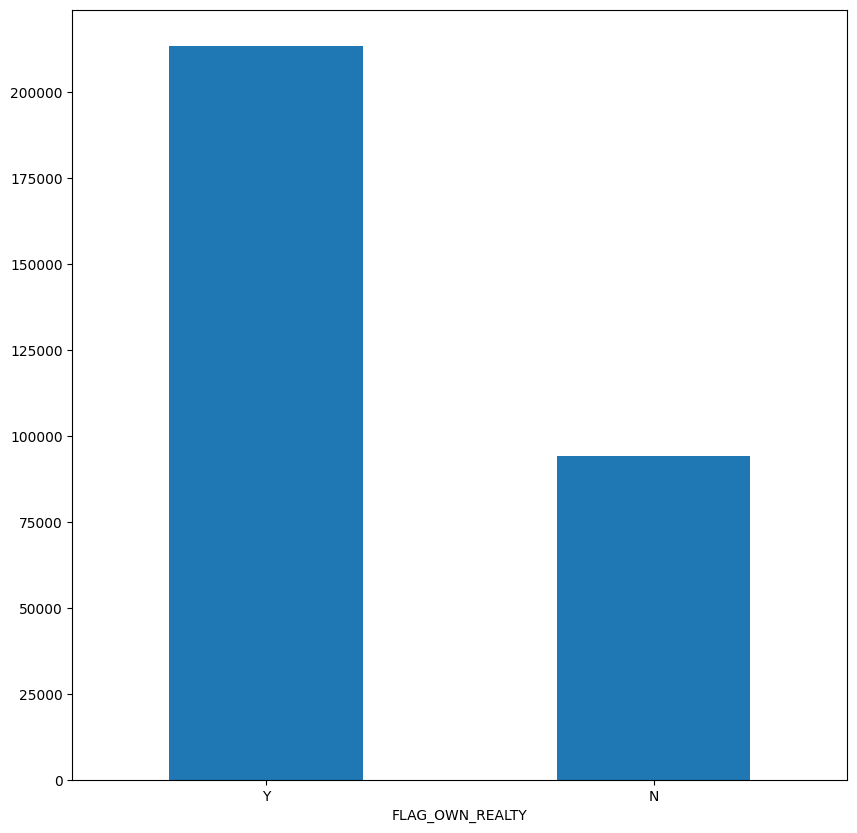

In [ ]:
plt.figure(figsize = (10, 10))
df_train['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

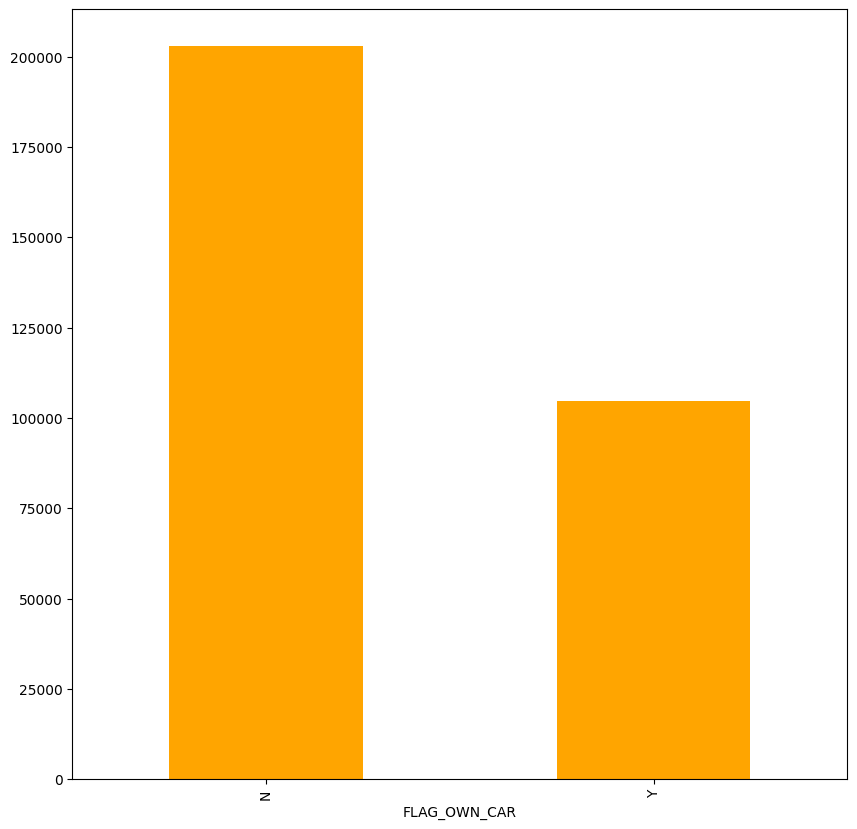

In [ ]:
plt.figure(figsize = (10, 10))
df_train['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar', color = 'orange')
plt.show()

**Kdeplot of AMT_INCOME_TOTAL**

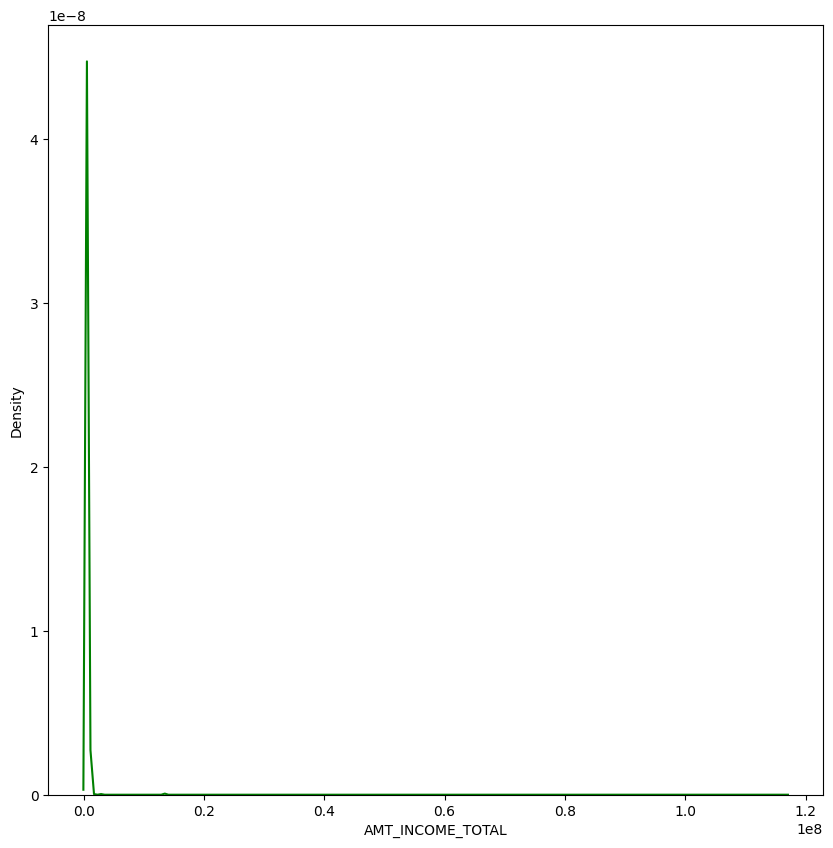

In [ ]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train['AMT_INCOME_TOTAL'], color = 'green')
plt.show()

**Countplot of Taget**

There are very few people who have defaulted the loan. Therefore, we are dealing with an imbalanced dataset, and care must be taken when using various machine learning models for predictions. Sometimes, the KNN networks might not work well especially when the number of nearest neighbors taken is 1. If it is taken, the output that we are going to be get would be swayed towards the majority class.

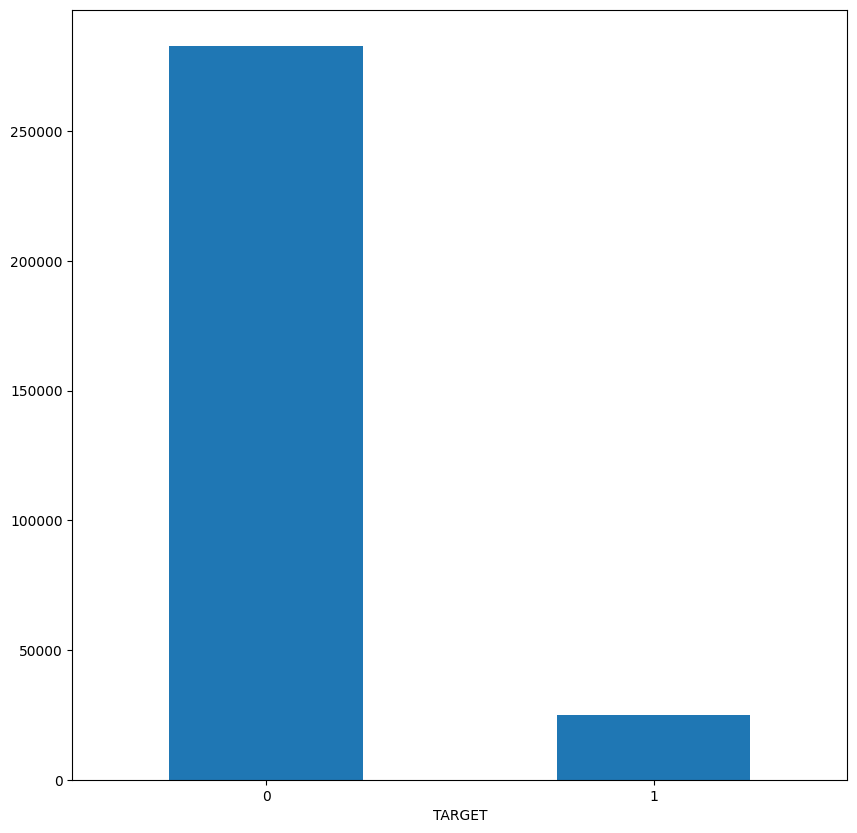

In [ ]:
plt.figure(figsize = (10, 10))
df_train['TARGET'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

**Kdeplot of AMT_INCOME_TOTAL**

Since the values that we took previously for plotting the averge income were quite high, let us restrict the values to just 800000 total income respectively. Below we see clearly that a large portion of customers have an income of about 1,00,000

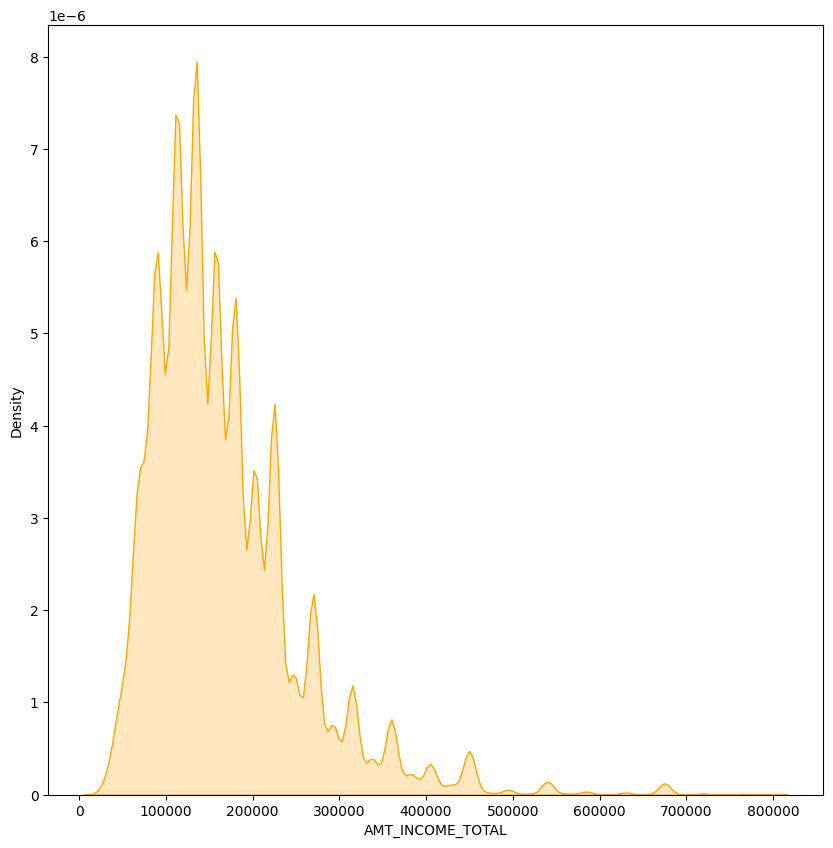

In [ ]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train[df_train['AMT_INCOME_TOTAL'] < 800000]['AMT_INCOME_TOTAL'], fill = True, color = 'orange')
plt.show()

**Kdeplot of AMT_CREDIT**

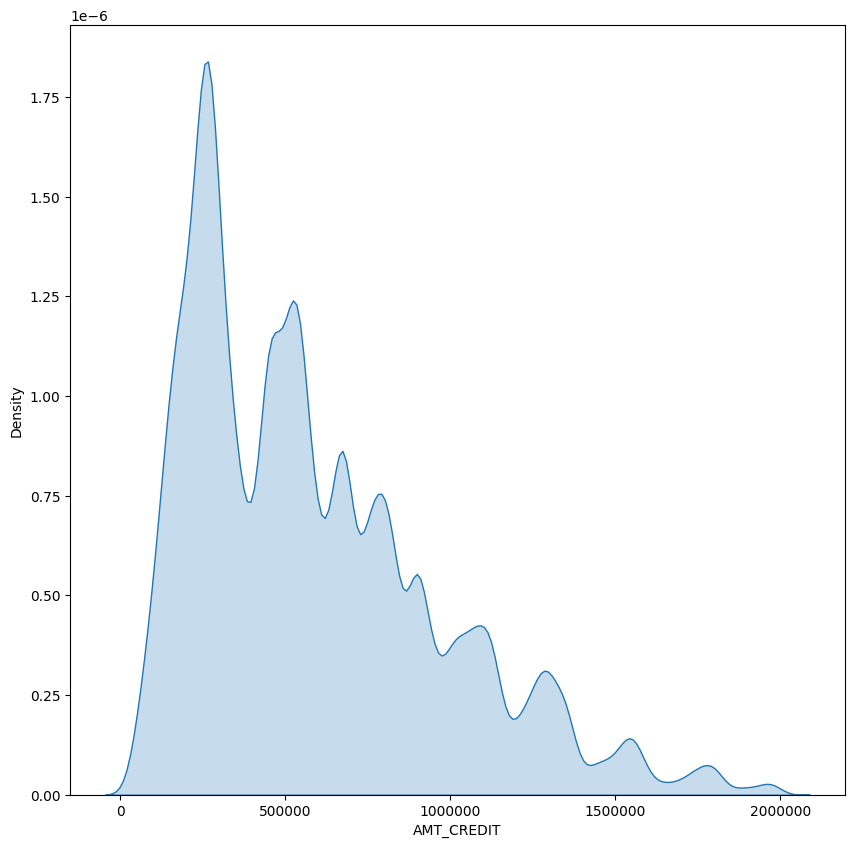

In [ ]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train[df_train['AMT_CREDIT'] < 2000000]['AMT_CREDIT'], fill = True)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

In [ ]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

Let us consider only the top 30 percent of values present in our data. We are going to be taking those values and we are getting an understanding of the missing values based on the function that we have created earlier.

In [ ]:
null_percentage(df_train).iloc[0: 30]['Percent']

,Percent
FLOORSMAX_MEDI,49.761144
FLOORSMAX_AVG,49.761144
FLOORSMAX_MODE,49.761144
YEARS_BEGINEXPLUATATION_AVG,48.781329
YEARS_BEGINEXPLUATATION_MEDI,48.781329
YEARS_BEGINEXPLUATATION_MODE,48.781329
TOTALAREA_MODE,48.268820
EMERGENCYSTATE_MODE,47.398596
OCCUPATION_TYPE,31.345303
EXT_SOURCE_3,19.825565


**MEAN Imputation**

In [ ]:
mean_imputation(df_train['FLOORSMAX_AVG'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MEDI'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MODE'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'], inplace = True)

In [ ]:
count = 0
def null_columns(dataframe):
    count = 0
    null_features = []
    for i in range(len(dataframe.columns)):
        if any(df_train[dataframe.columns[i]].isnull()):
            count = count + 1
            null_features.append(dataframe.columns[i])
    return null_features, count

In [ ]:
null_columns, total_null_features = null_columns(df_train)

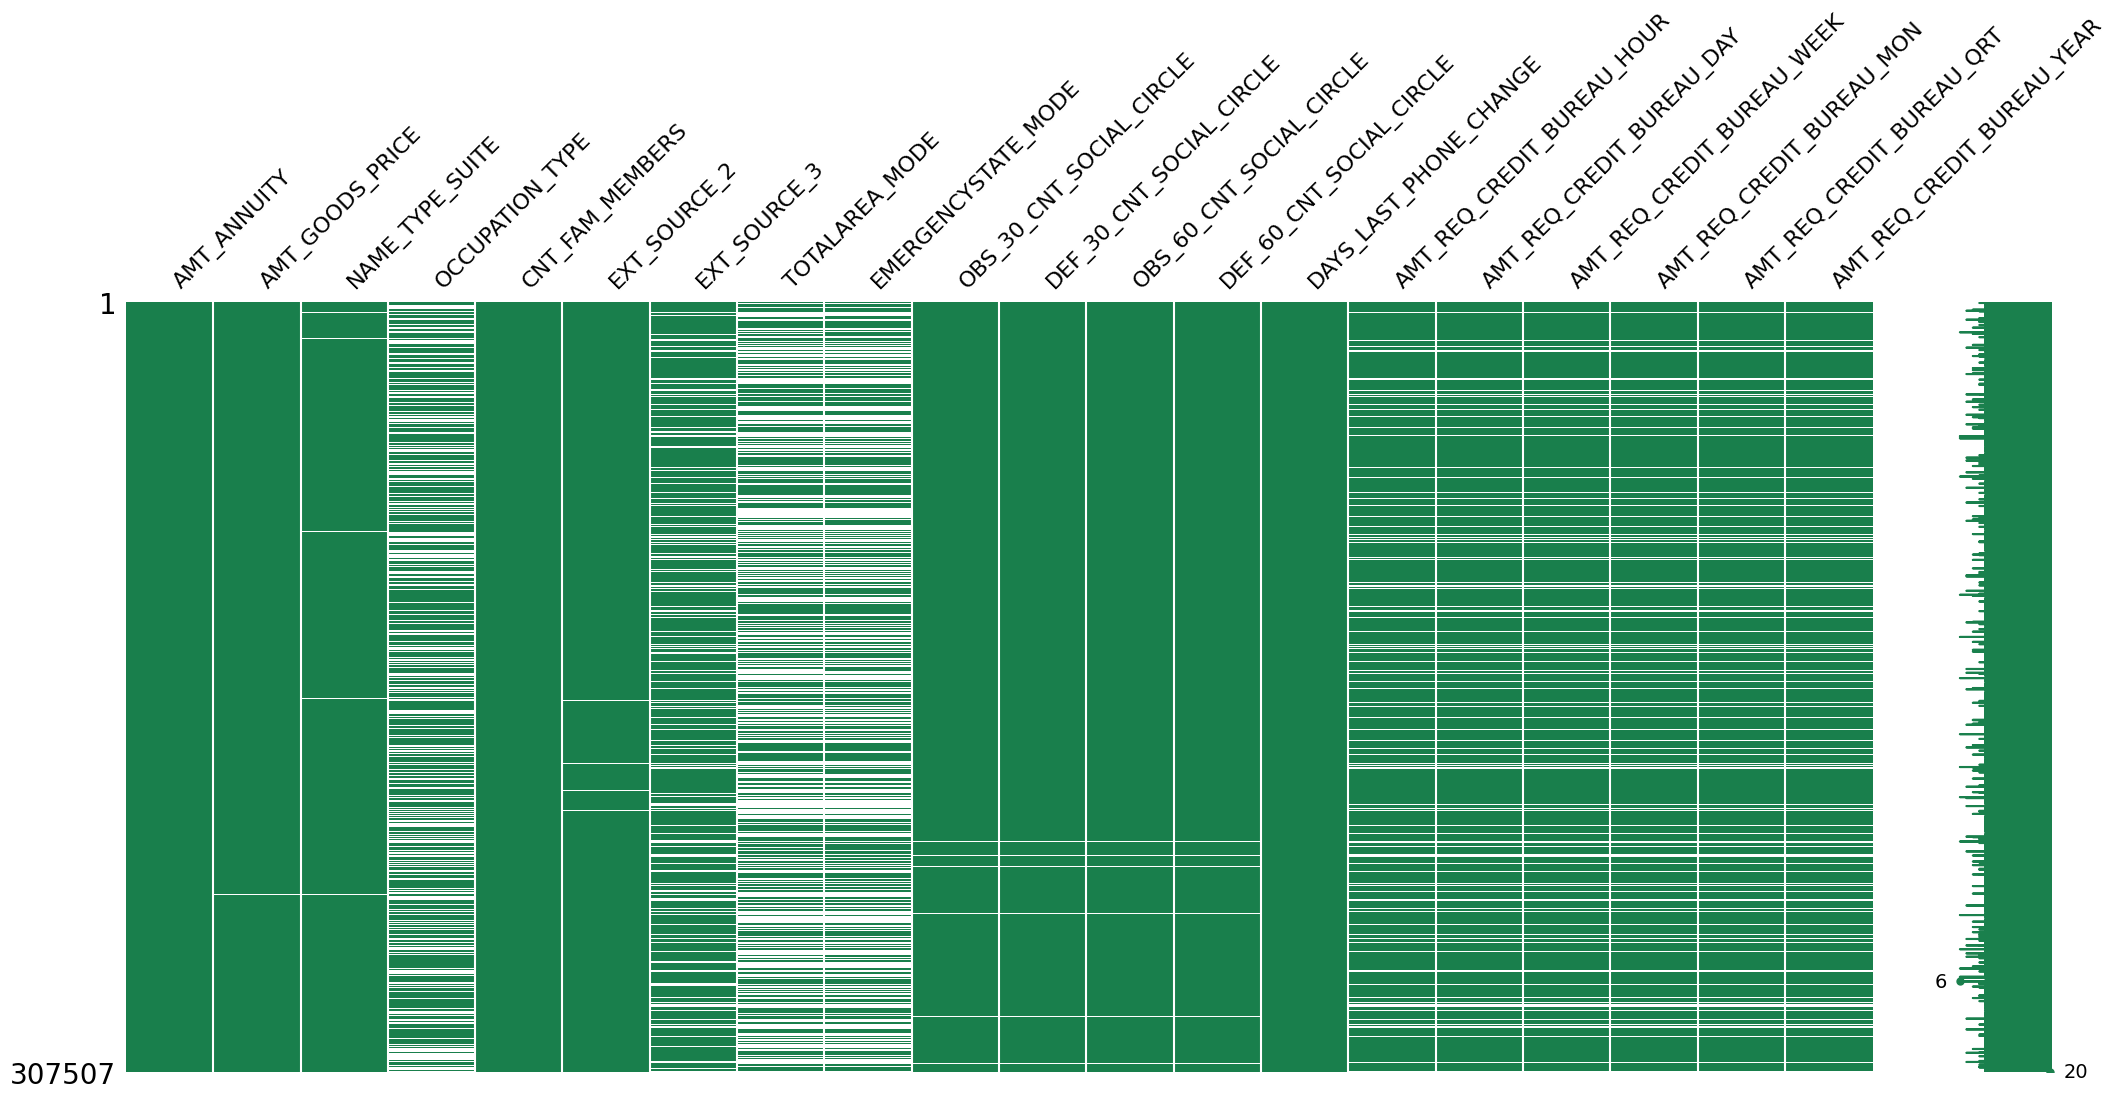

In [ ]:
msno.matrix(df_train[null_columns], color = (0.1, 0.5, 0.3))
plt.show()

In [ ]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i])

In [ ]:
features_with_low_null_values

['NAME_TYPE_SUITE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'CNT_CHILDREN',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'TARGET',
 'SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'FLAG_MOBIL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT',
 'FLAG_EMP_PHONE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'LIVE_

In [ ]:
df_train[features_with_low_null_values].head()

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,0,0,0,0,0,0,0,0
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,0,0,0,0,0,0,0,0
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,0,0,0,0,0,0,0,0
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,0,0,0,0,0,0,0,0
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train[features_with_low_null_values].shape

(307507, 71)

In [ ]:
df_train[features_with_low_null_values]['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,248523
Family,40148
"Spouse, partner",11370
Children,3267
Other_B,1770
Other_A,866
Group of people,271


In [ ]:
df_train[features_with_low_null_values].head()

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,0,0,0,0,0,0,0,0
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,0,0,0,0,0,0,0,0
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,0,0,0,0,0,0,0,0
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,0,0,0,0,0,0,0,0
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_converted = df_train[features_with_low_null_values]

In [ ]:
total_columns =df_train_converted.columns
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [ ]:
df_train_converted[categorical_columns].head()

,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,ORGANIZATION_TYPE
0,Working,Cash loans,House / apartment,Y,M,WEDNESDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Business Entity Type 3
1,State servant,Cash loans,House / apartment,N,F,MONDAY,Higher education,N,Married,Family,School
2,Working,Revolving loans,House / apartment,Y,M,MONDAY,Secondary / secondary special,Y,Single / not married,Unaccompanied,Government
3,Working,Cash loans,House / apartment,Y,F,WEDNESDAY,Secondary / secondary special,N,Civil marriage,Unaccompanied,Business Entity Type 3
4,Working,Cash loans,House / apartment,Y,M,THURSDAY,Secondary / secondary special,N,Single / not married,Unaccompanied,Religion


<Axes: >

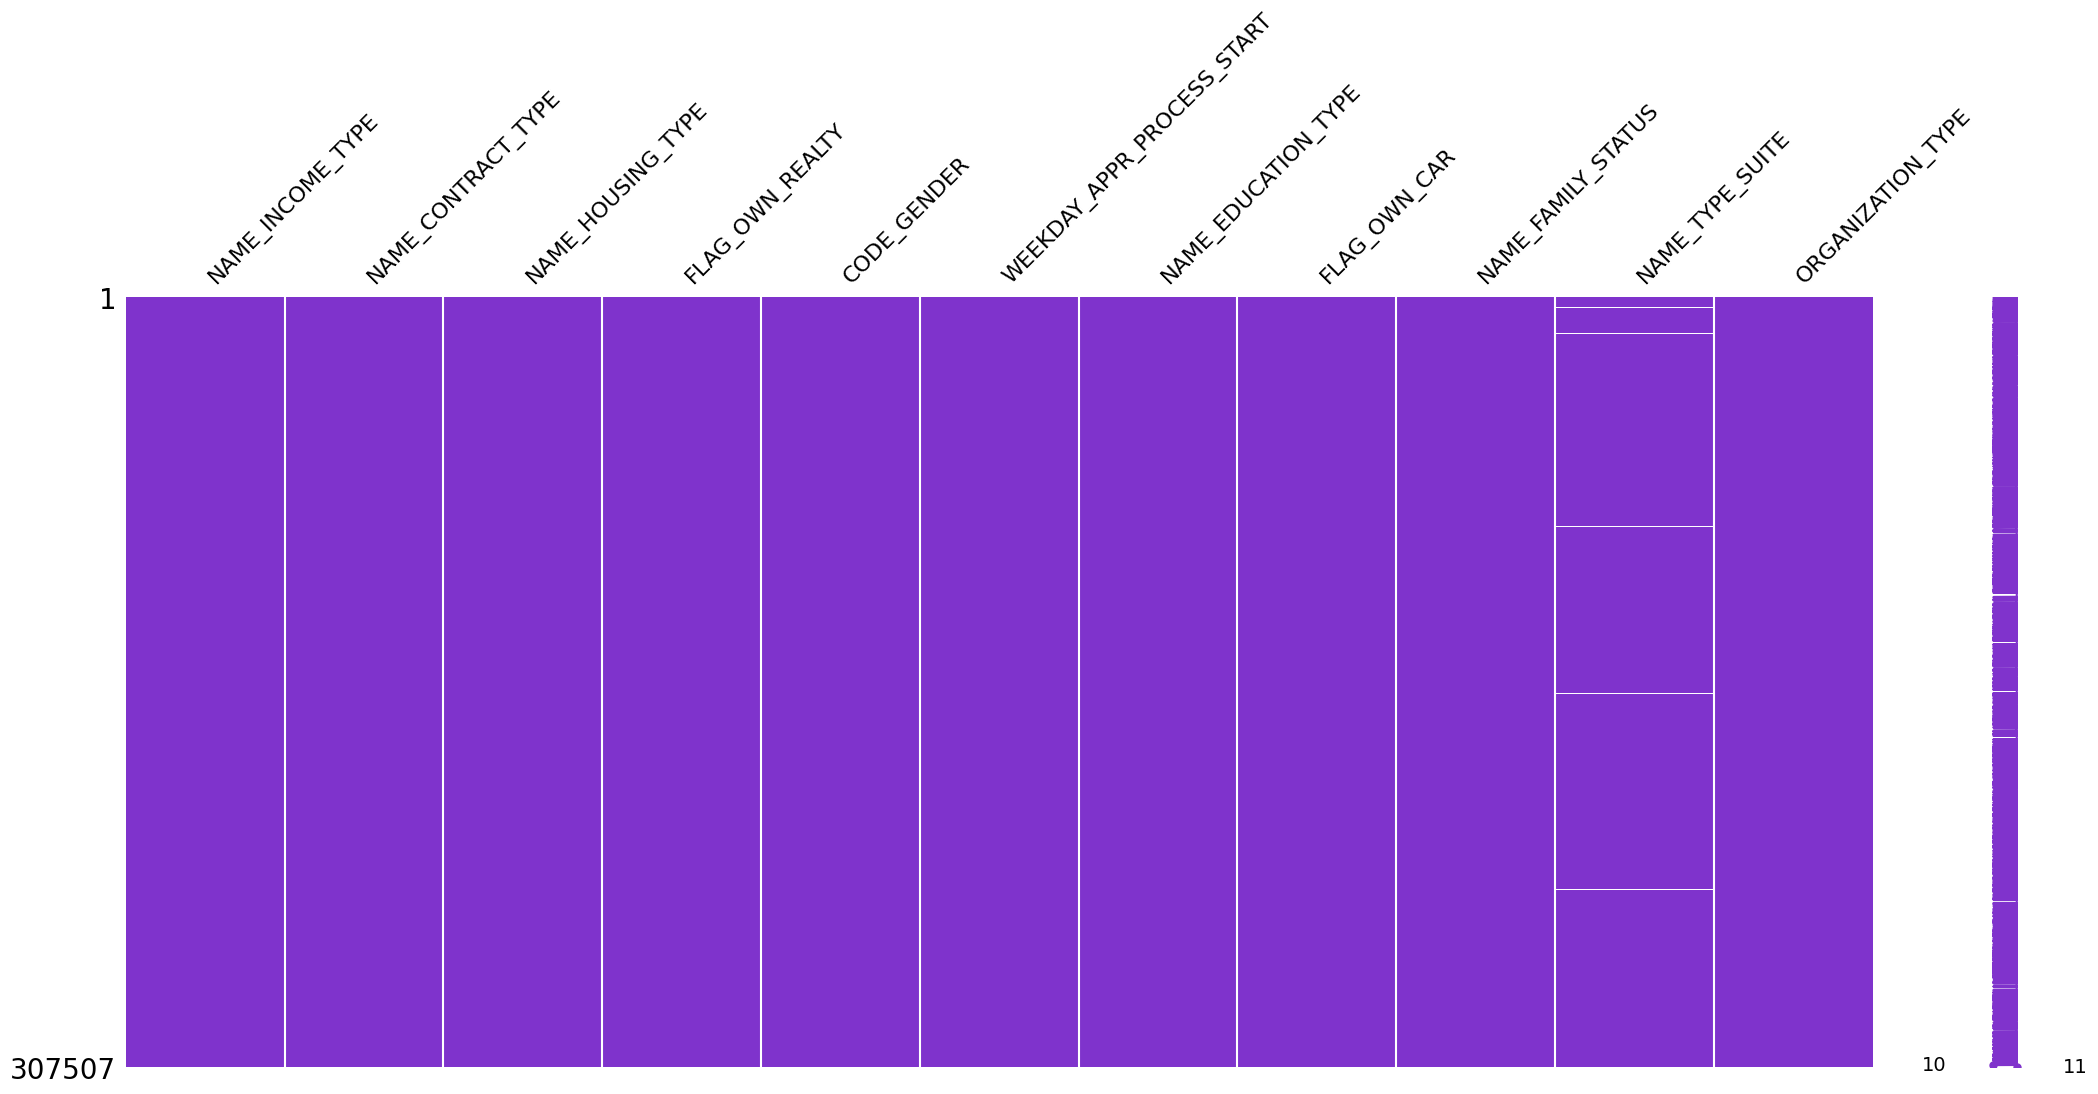

In [ ]:
msno.matrix(df_train_converted[categorical_columns], color = (0.5, 0.2, 0.8))

In [ ]:
categorical_data = df_train_converted[categorical_columns]

In [ ]:
mode_imputation(categorical_data, inplace = True)

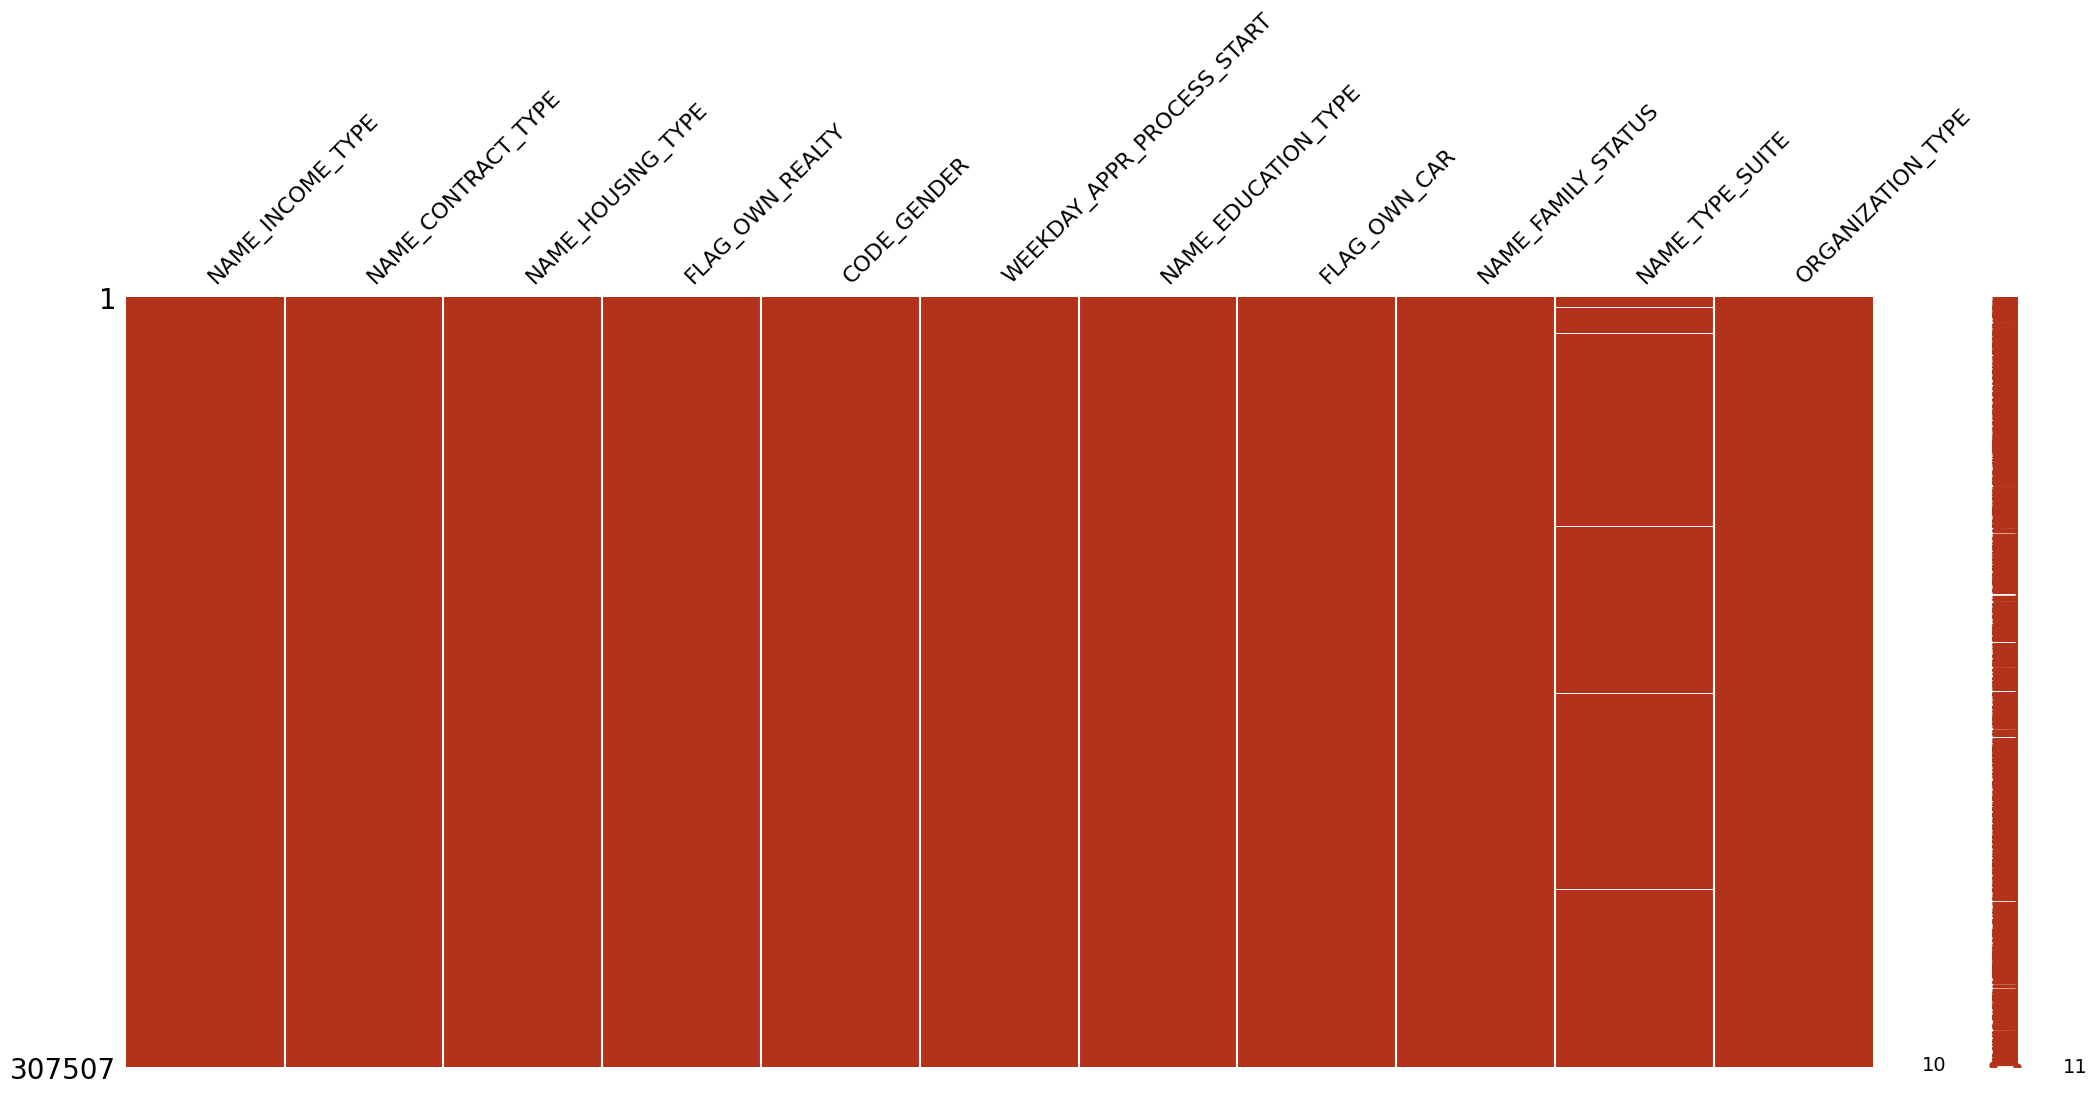

In [ ]:
msno.matrix(categorical_data, color = (0.7, 0.2, 0.1))
plt.show()

In [ ]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [ ]:
categorical_data['NAME_TYPE_SUITE'].describe()

,NAME_TYPE_SUITE
count,307507
unique,7
top,Unaccompanied
freq,249815


In [ ]:
any(categorical_data['NAME_TYPE_SUITE'].isnull())

False

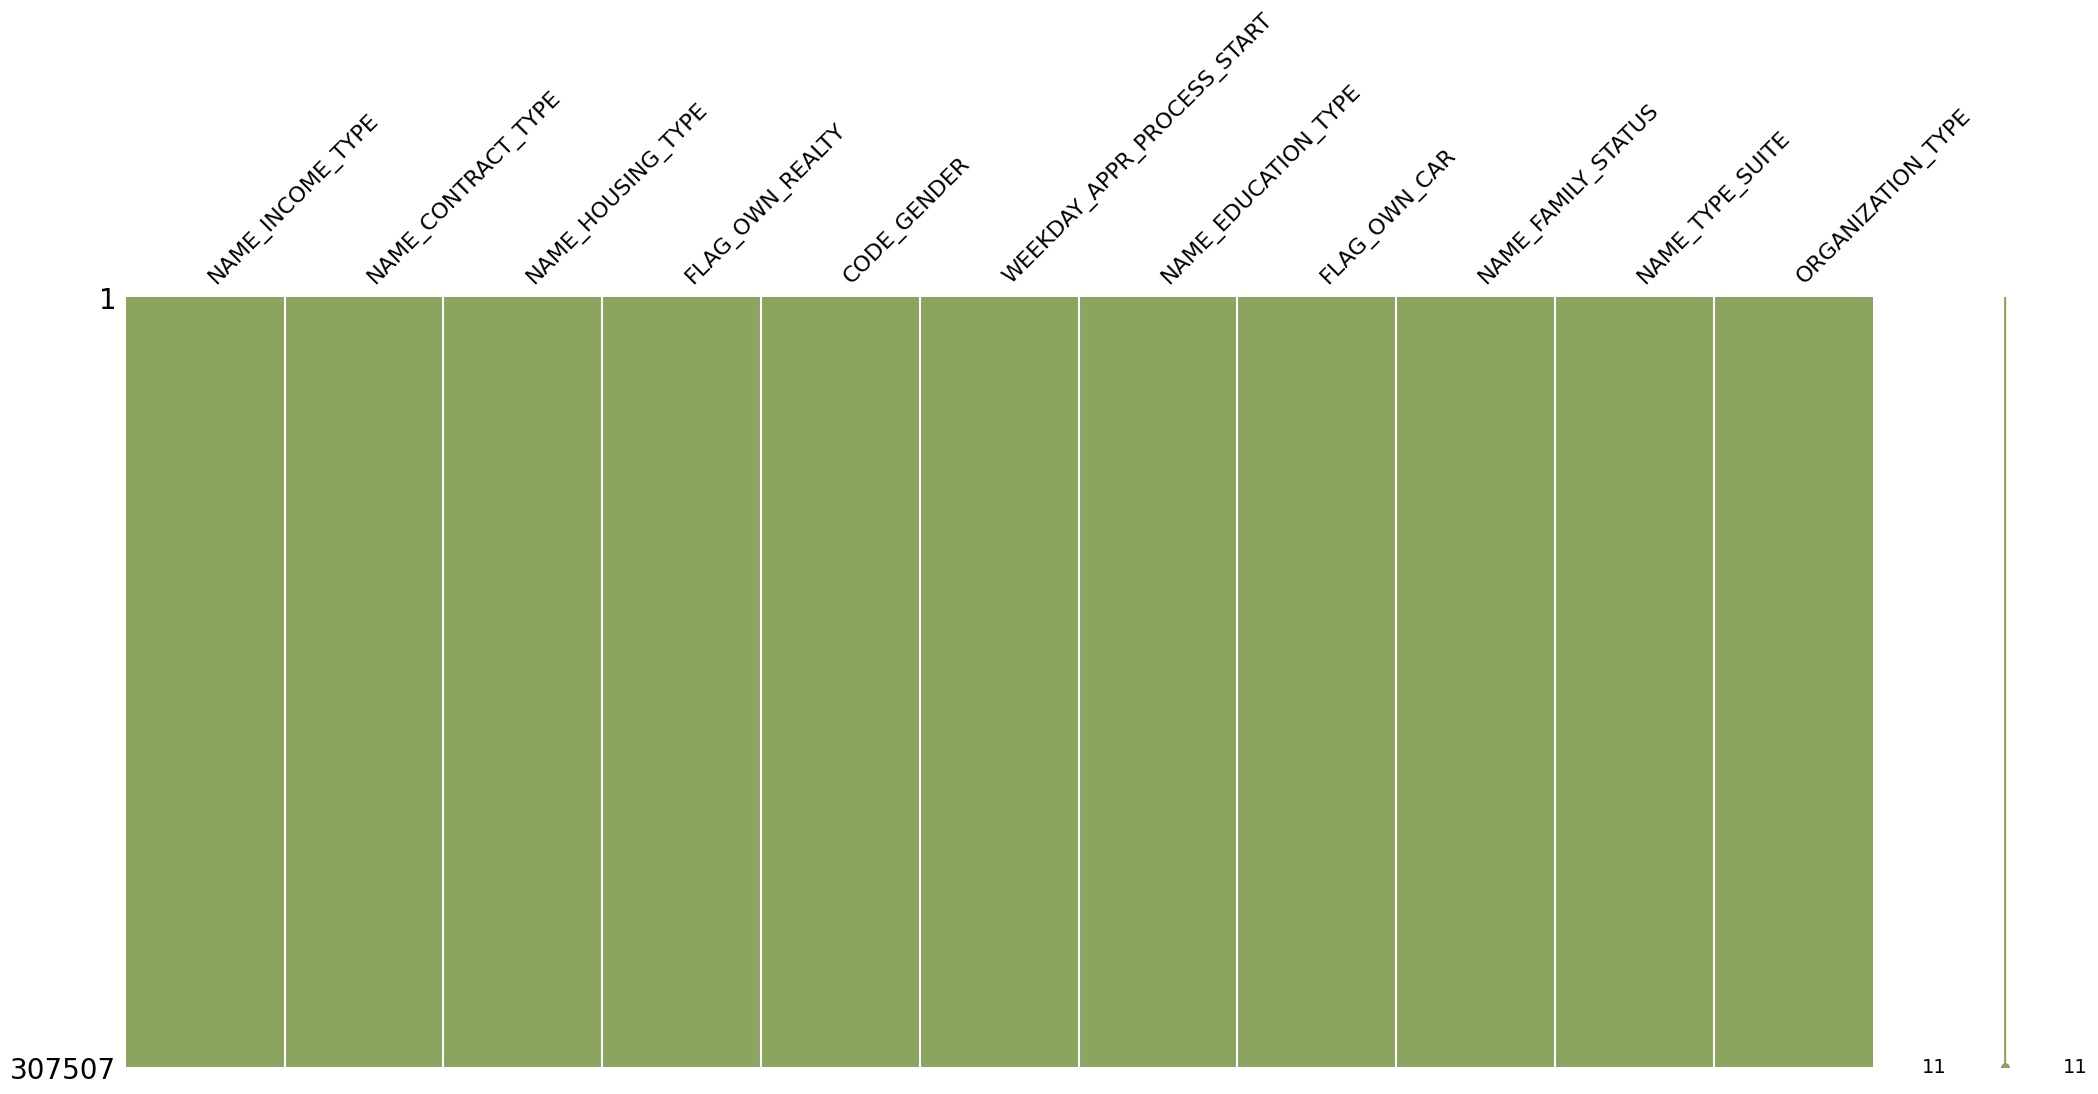

In [ ]:
msno.matrix(categorical_data, color = (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)))
plt.show()

Now numeric columns

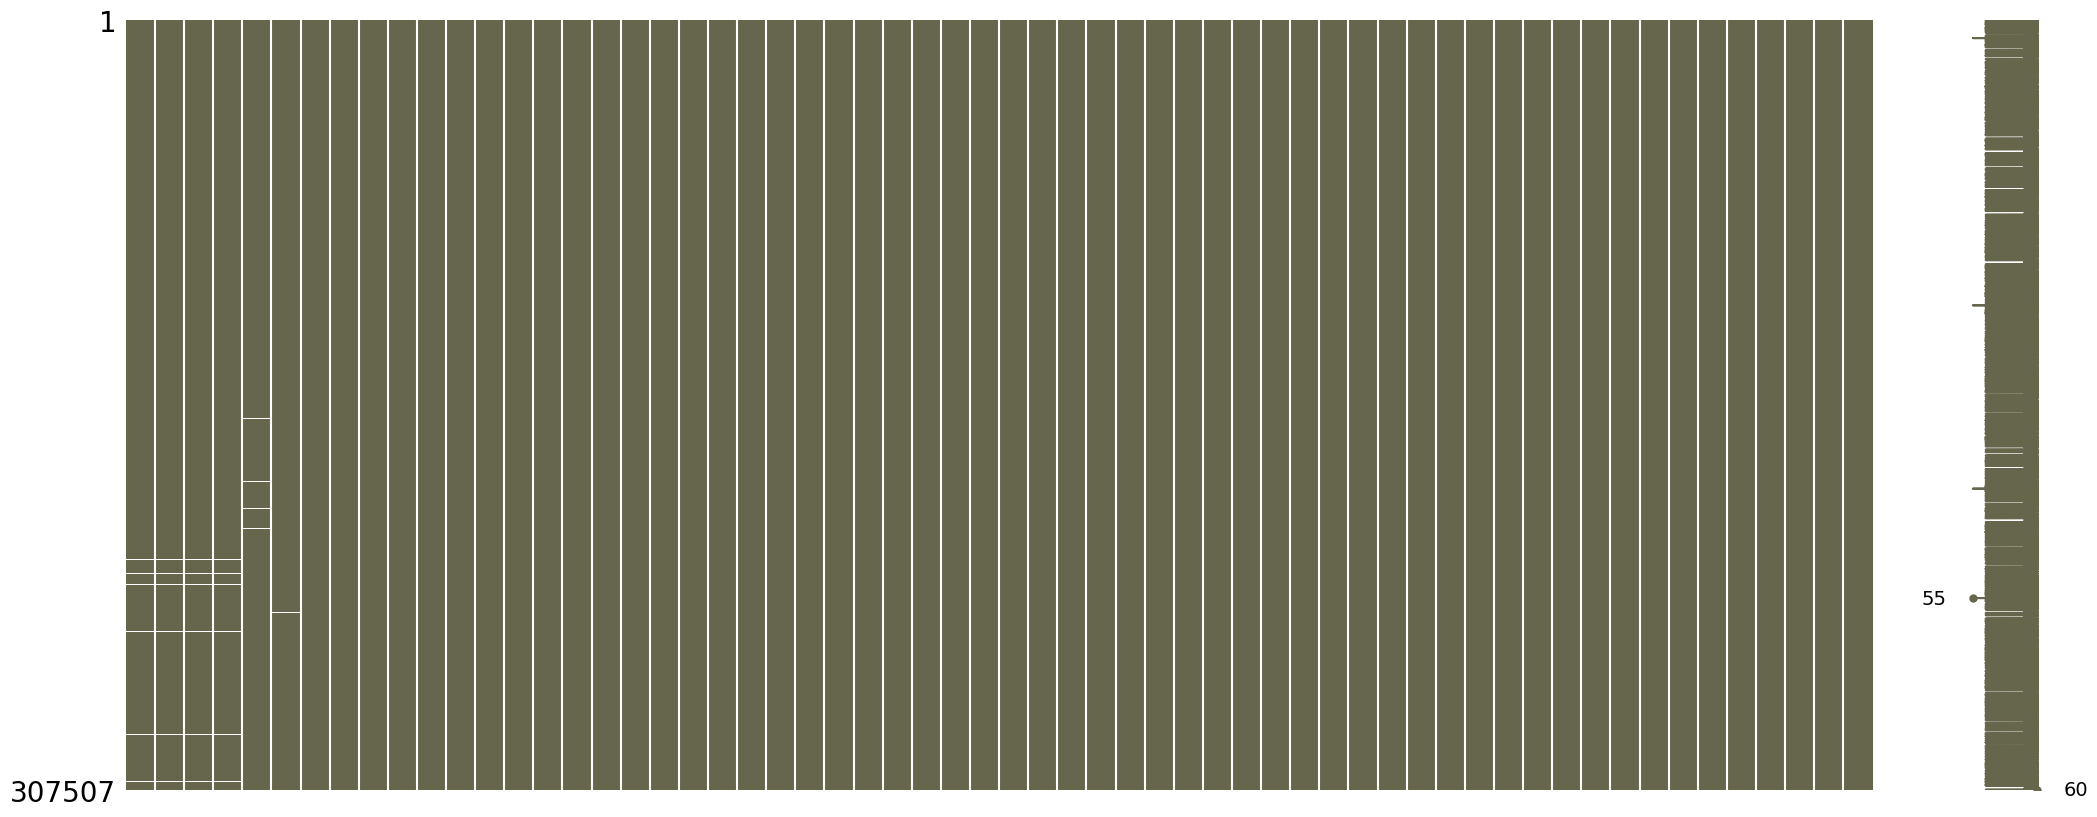

In [ ]:
msno.matrix(numeric_data, color = (0.4, 0.4, 0.3))
plt.show()

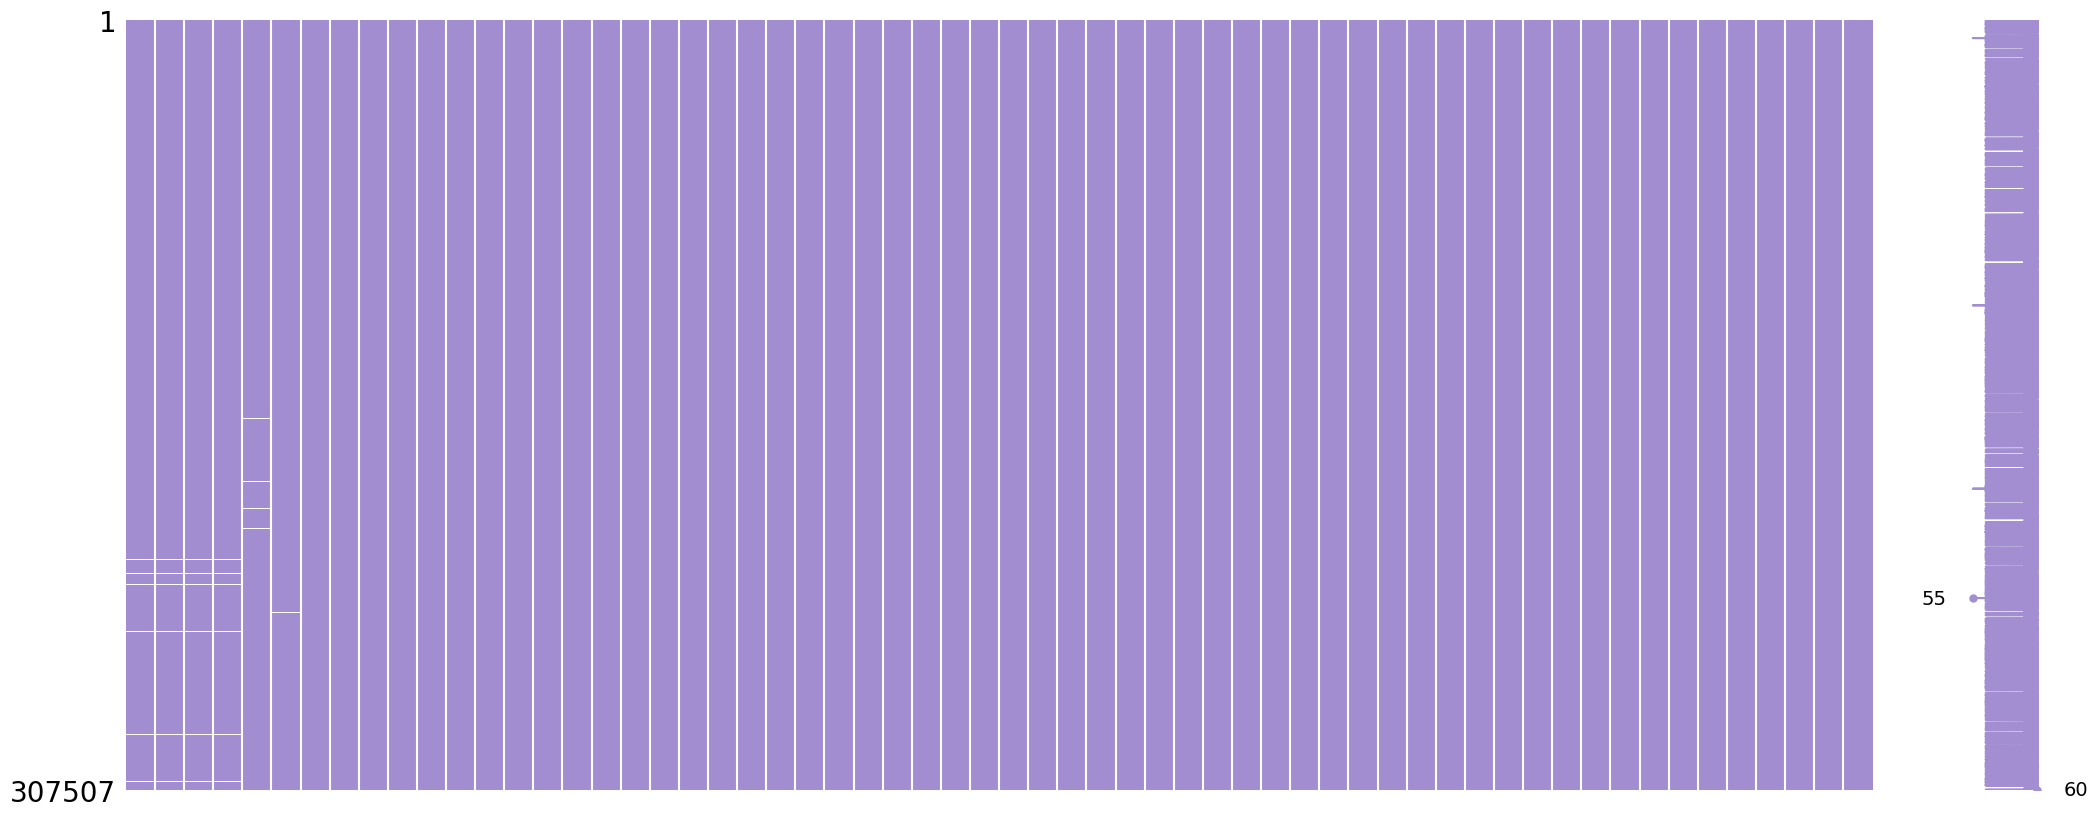

In [ ]:
msno.matrix(numeric_data, color = (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)))
plt.show()

In [ ]:
mean_imputation(numeric_data, inplace = True)

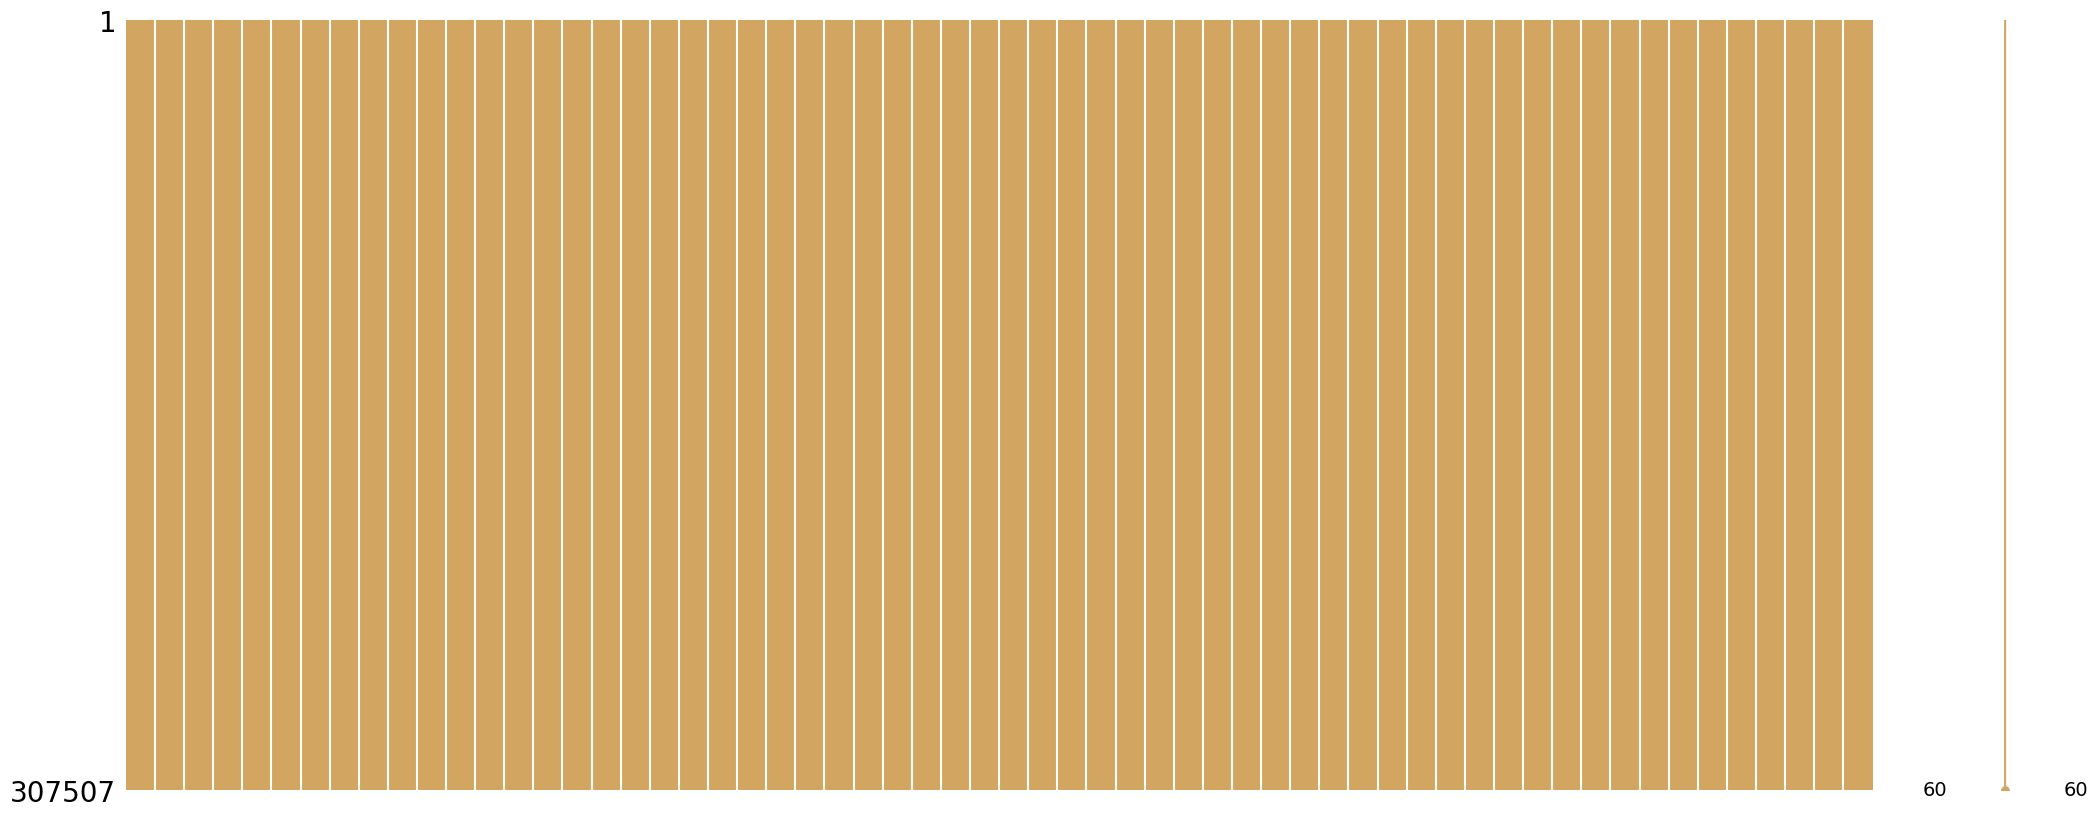

In [ ]:
msno.matrix(numeric_data, color = (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)))
plt.show()

In [ ]:
any(numeric_data.isnull())

True

In [ ]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numeric_data.columns

Index(['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'TARGET', 'SK_ID_CURR',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT

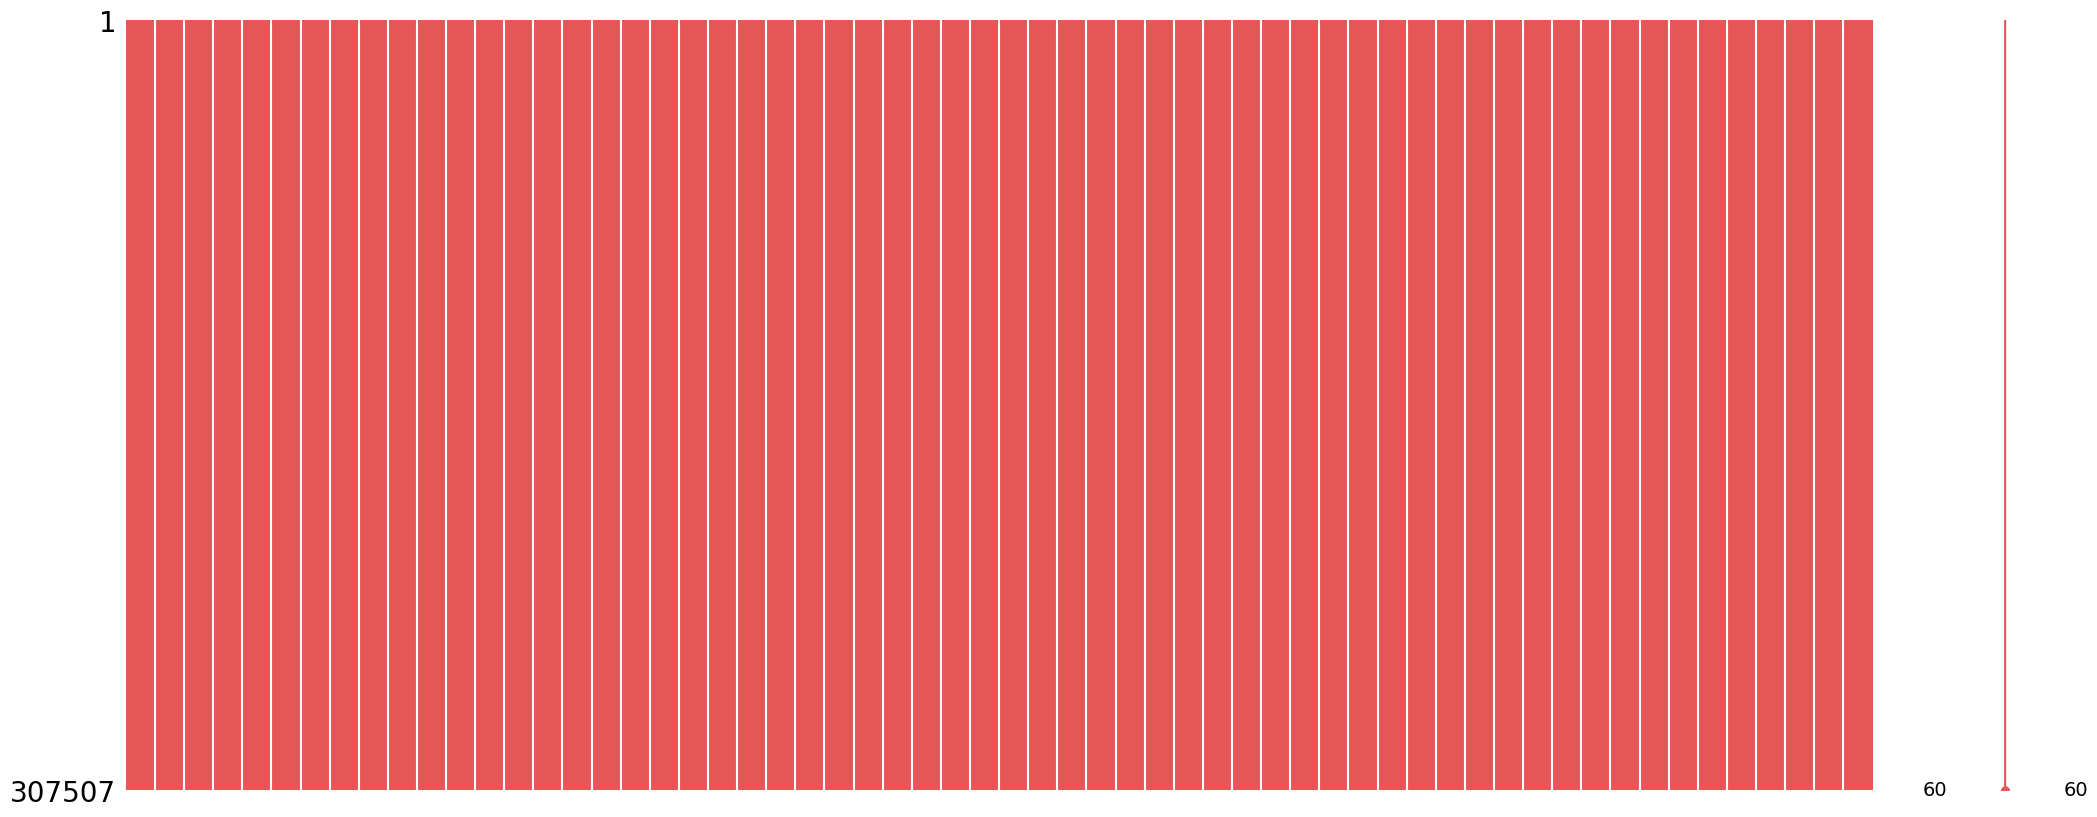

In [ ]:
msno.matrix(numeric_data, color = (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)))
plt.show()

In [ ]:
def sampler_function(data_x, data_y, sampler = 0, random_state = 101):

    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    else:
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)

    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)

    return X_transformed, y_transformed

In [ ]:
numeric_data_with_target_dropped = numeric_data.drop('TARGET', axis = 1)

In [ ]:
X = numeric_data_with_target_dropped
y = df_train['TARGET'].values

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_cv_standardized = scaler.transform(X_cv)

In [ ]:
X_train, y_train = sampler_function(X_train_standardized, y_train, sampler = 0)

Original dataset shape: (215254,)
Resample dataset shape: (395864,)


In [ ]:
X_cv, y_cv = sampler_function(X_cv_standardized, y_cv, sampler = 0)

Original dataset shape: (92253,)
Resample dataset shape: (169500,)


# Starting with logistic  regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [ ]:
mean_absolute_error(y_predictions, y_cv)

0.3555457227138643

In [ ]:
accuracy_score(y_predictions, y_cv)

0.6444542772861357

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

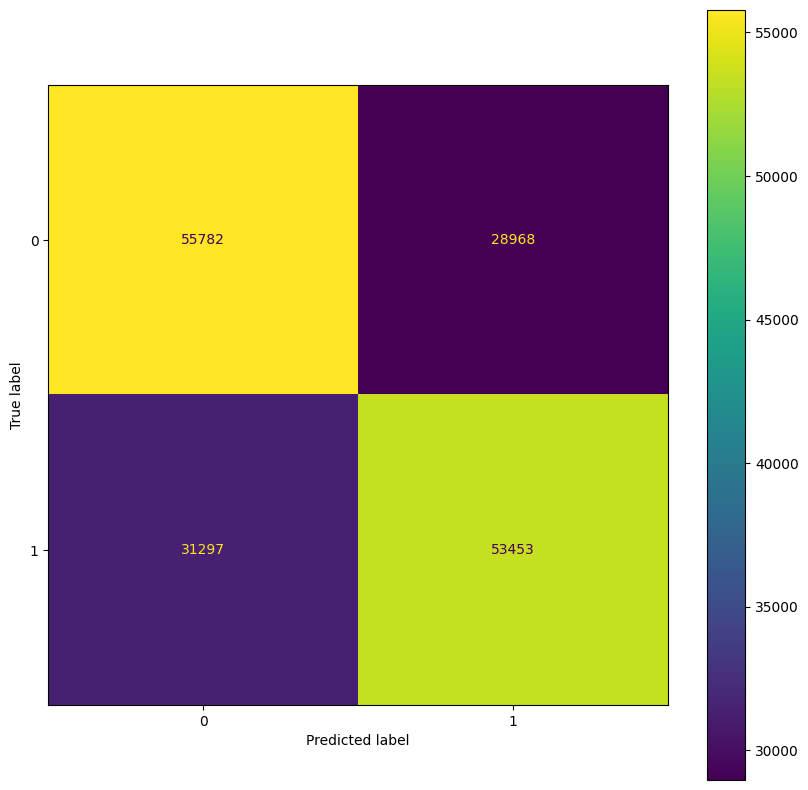

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.6985069181089617


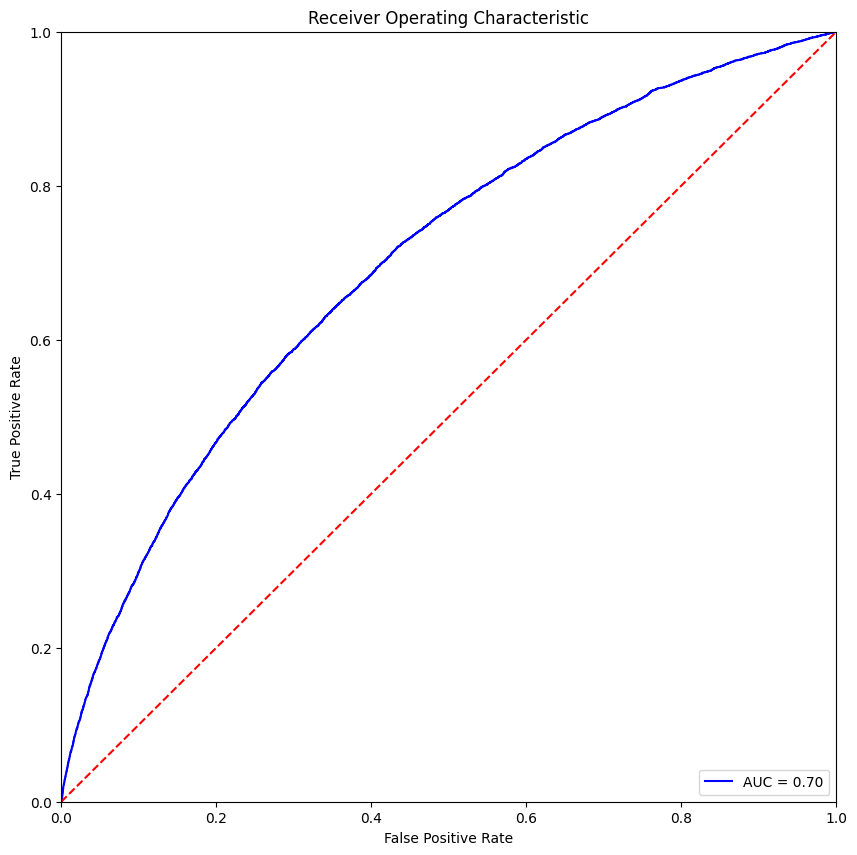

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Naive Bayes Classifier**

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

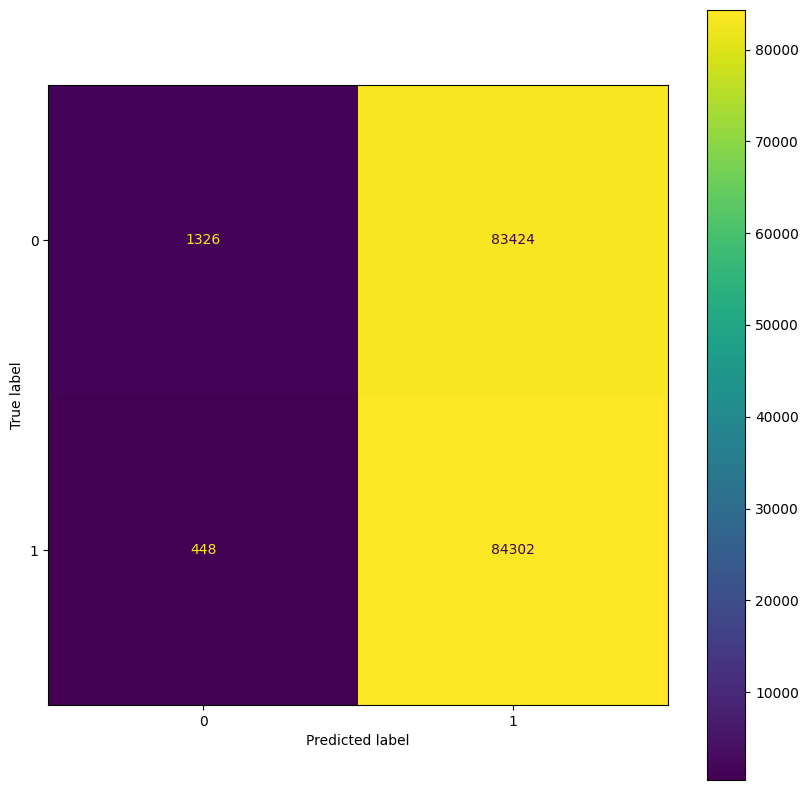

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.6442324416947295


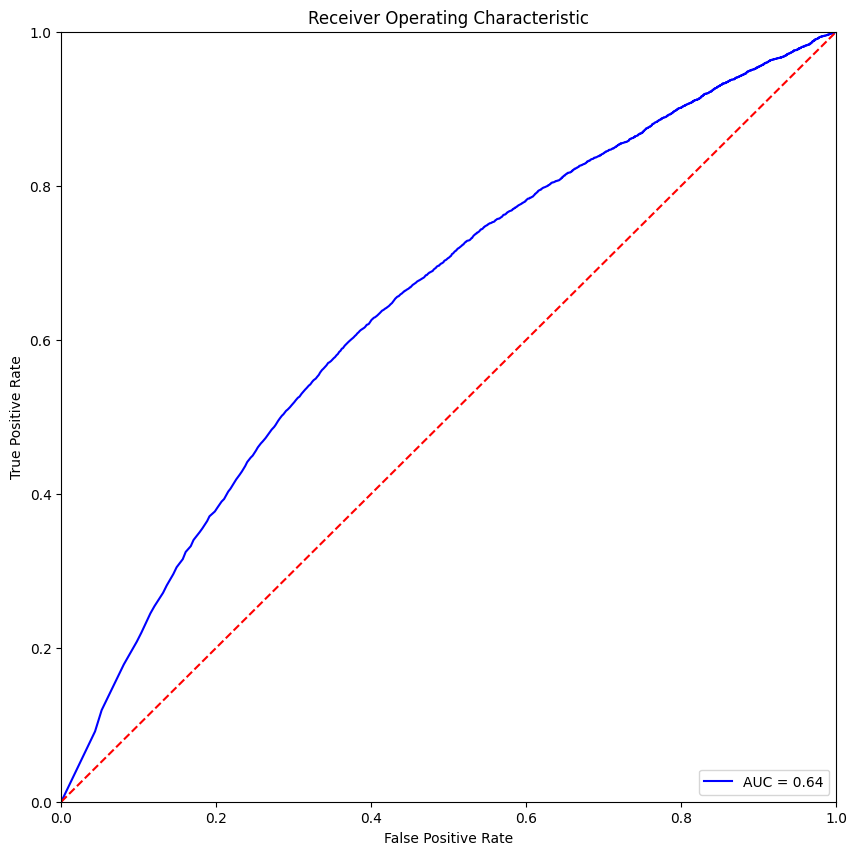

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

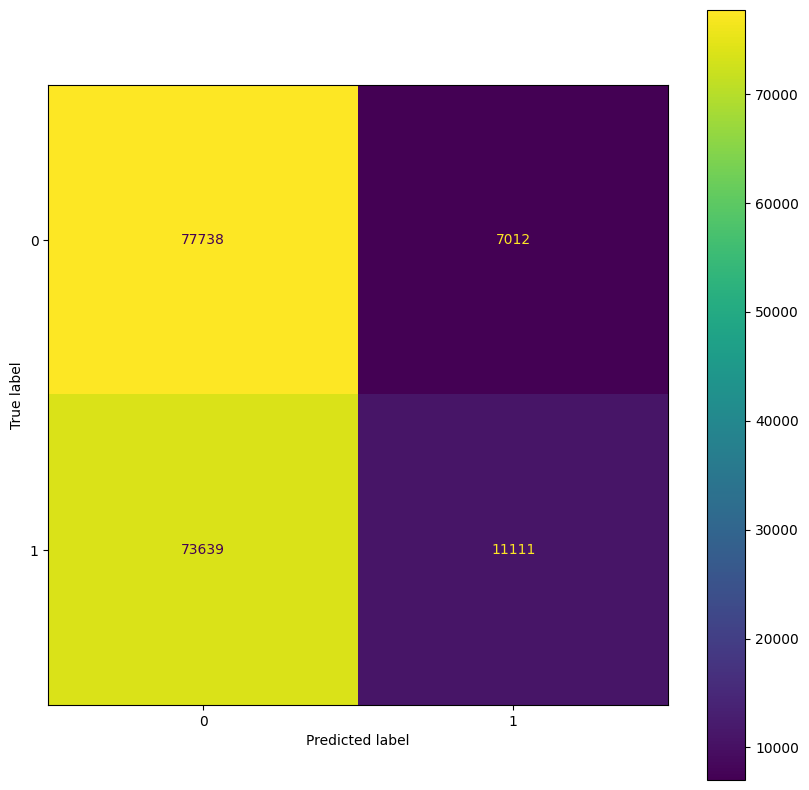

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66    151377
           1       0.13      0.61      0.22     18123

    accuracy                           0.52    169500
   macro avg       0.52      0.56      0.44    169500
weighted avg       0.83      0.52      0.61    169500



AUC for our classifier is: 0.5241828908554572


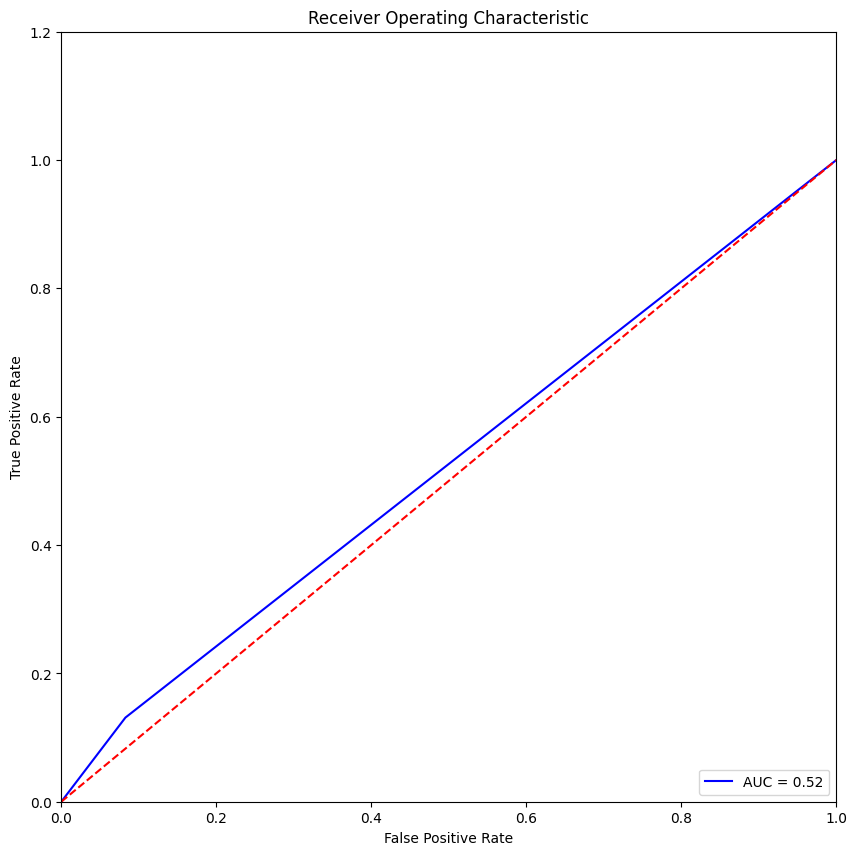

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67    168765
           1       0.01      0.86      0.01       735

    accuracy                           0.50    169500
   macro avg       0.50      0.68      0.34    169500
weighted avg       0.99      0.50      0.66    169500



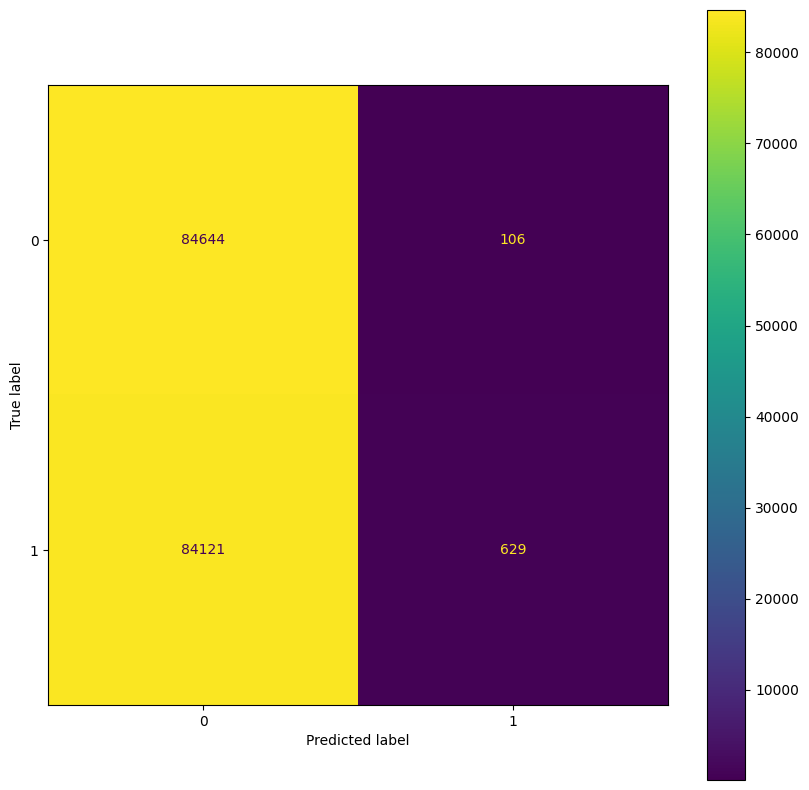

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.6808813472907476


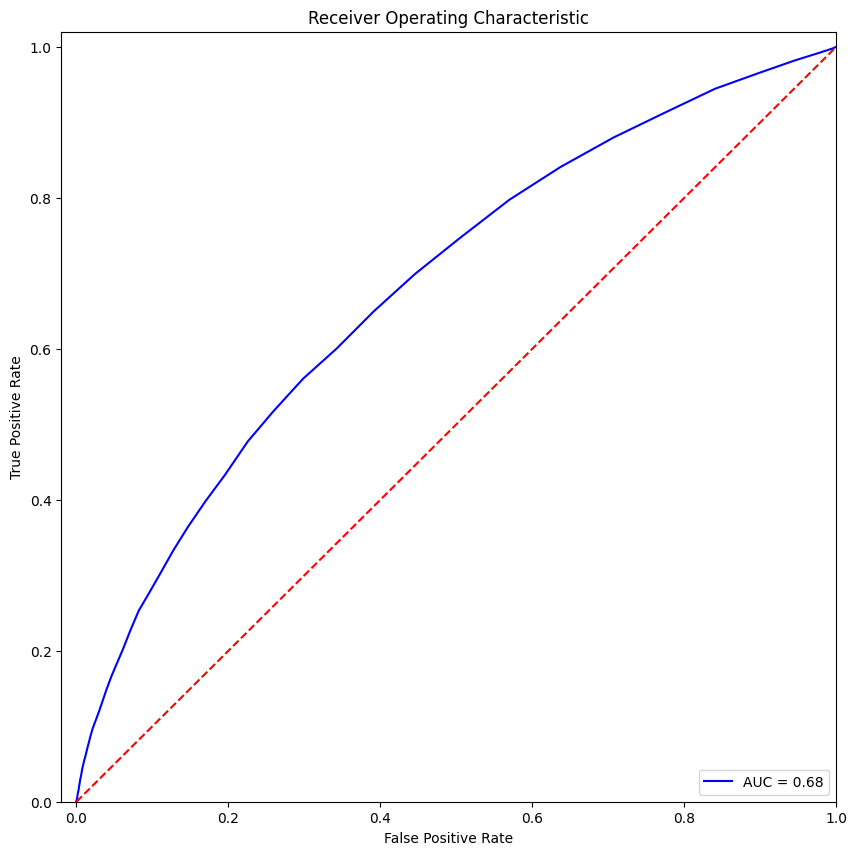

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X = numeric_data_with_target_dropped
y = df_train['TARGET'].values

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_cv_standardized = scaler.transform(X_cv)


X_train, y_train = sampler_function(X_train_standardized, y_train, sampler = 2)
X_cv, y_cv = sampler_function(X_cv_standardized, y_cv, sampler = 2)

Original dataset shape: (215254,)
Resample dataset shape: (395864,)
Original dataset shape: (92253,)
Resample dataset shape: (169500,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

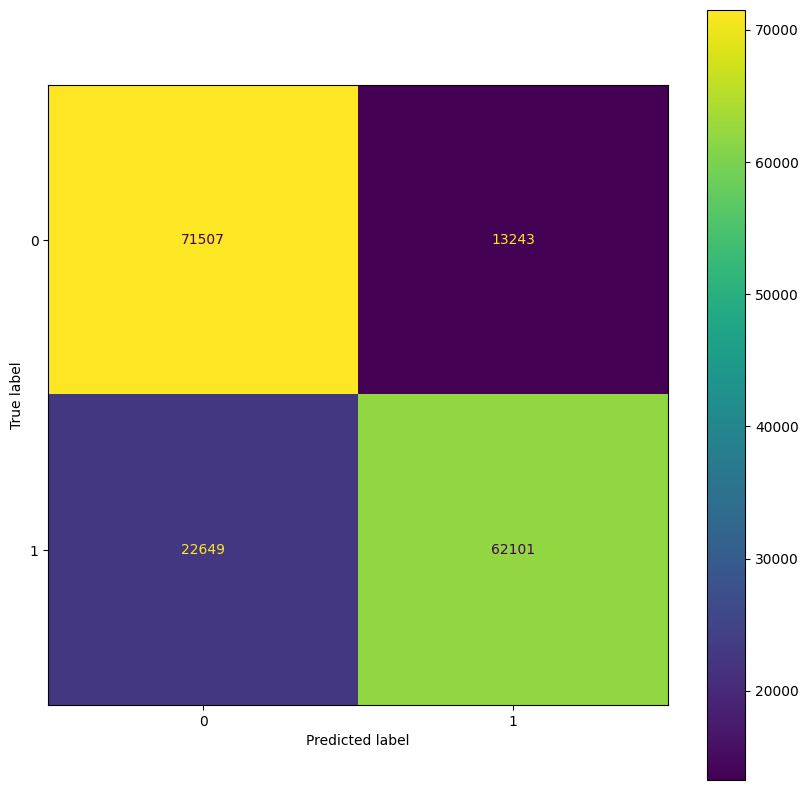

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     94156
           1       0.73      0.82      0.78     75344

    accuracy                           0.79    169500
   macro avg       0.79      0.79      0.79    169500
weighted avg       0.79      0.79      0.79    169500



AUC for our classifier is: 0.7882477876106195


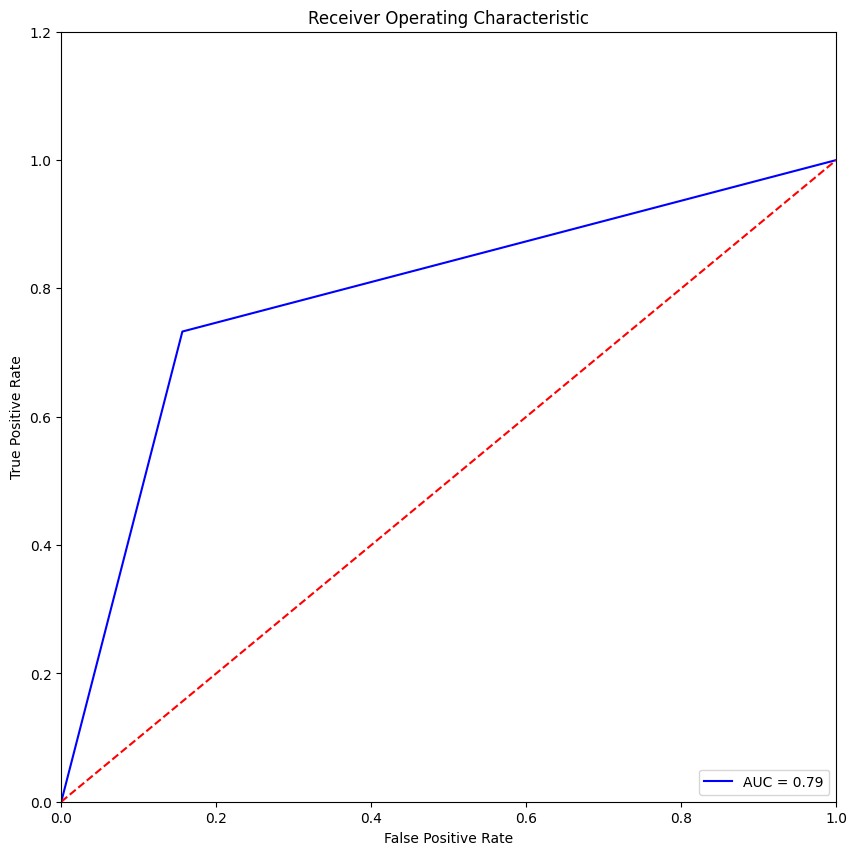

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

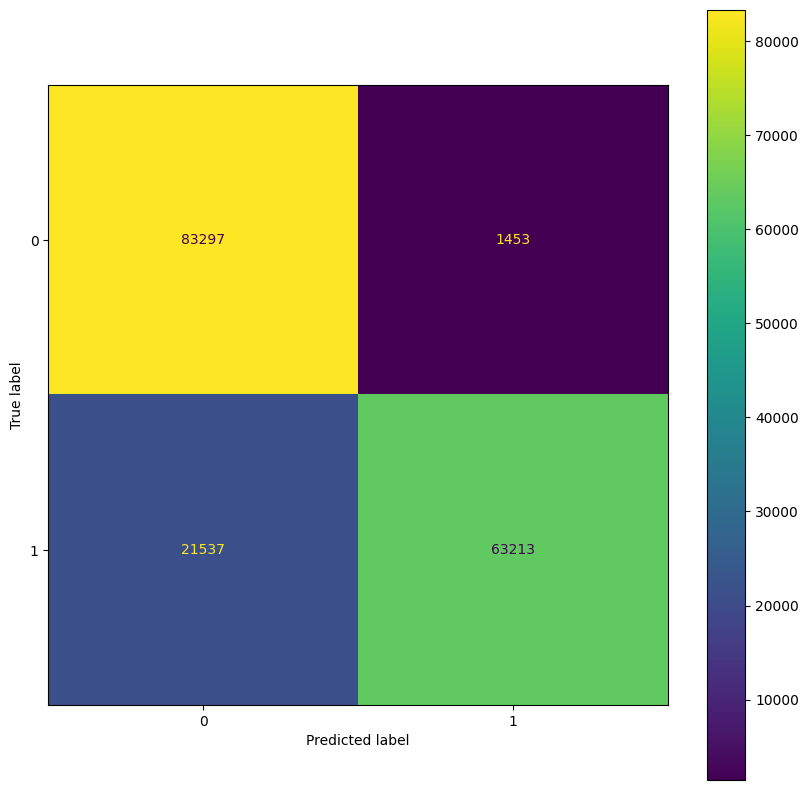

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.9481652623280342


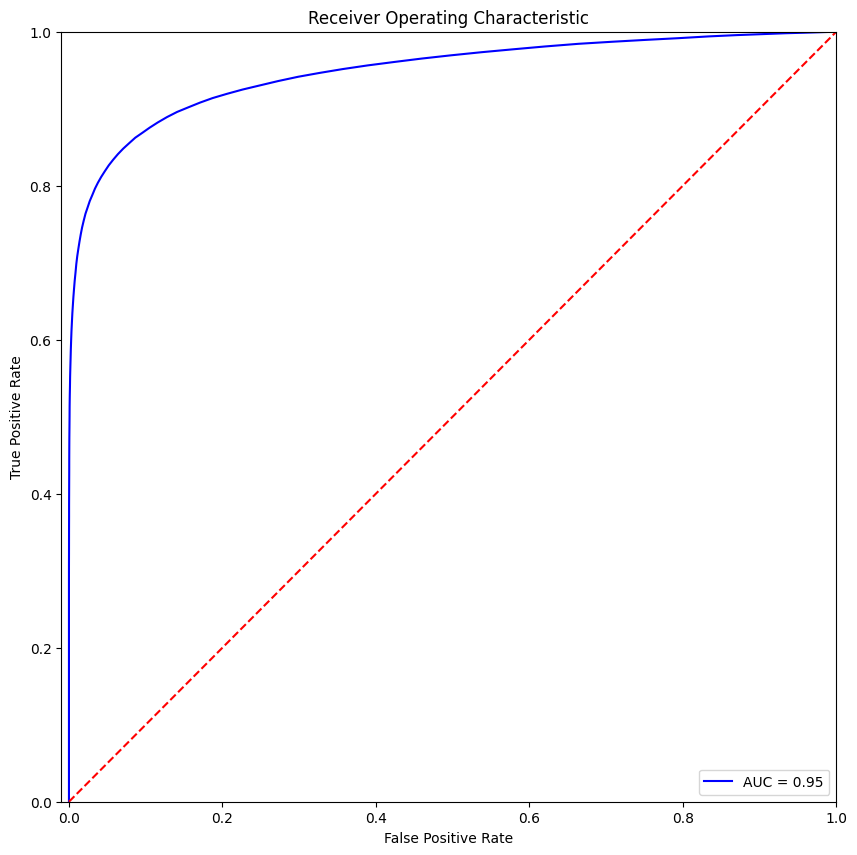

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88    104834
           1       0.75      0.98      0.85     64666

    accuracy                           0.86    169500
   macro avg       0.86      0.89      0.86    169500
weighted avg       0.89      0.86      0.87    169500



**Hyperparameter Tuning (Random Forest Model)**

In [ ]:
# This code cell can take about 10 minutes to run as we are performing hyperparameter tuning

# Define the parameter grid for tuning
param_grid = {'n_estimators': [10, 20]}

# Define the classifier used
model = RandomForestClassifier(n_jobs = -1)

# Create the grid search object
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

# Create a progress bar
pbar = tqdm(total=len(grid_search.param_grid['n_estimators']))

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Update the progress bar
pbar.update(1)

# Close the progress bar
pbar.close()

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

 50%|█████     | 1/2 [03:49<03:49, 229.79s/it]


In [ ]:
print(best_params)

{'n_estimators': 20}


In [ ]:
X_numeric = numeric_data.drop(['TARGET'], axis = 1)
y = numeric_data['TARGET']

X_categorical = categorical_data

In [ ]:
X_train_numeric, X_cv_numeric, y_train, y_cv = train_test_split(X_numeric, y, test_size = 0.3, random_state = 101)
X_train_categorical, X_cv_categorical, y_train, y_cv = train_test_split(X_categorical, y, test_size = 0.3, random_state = 101)

In [ ]:
encoder = OneHotEncoder()
encoder.fit(X_train_categorical)
X_train_ohe = encoder.transform(X_train_categorical)
X_cv_ohe = encoder.transform(X_cv_categorical)

In [ ]:
final_df_train = pd.concat([X_train_numeric, pd.DataFrame(X_train_ohe.toarray()).reset_index(drop = True, inplace = True)], axis = 1)
final_df_cv = pd.concat([X_cv_numeric, pd.DataFrame(X_cv_ohe.toarray()).reset_index(drop = True, inplace = True)], axis = 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(final_df_train)
X_train_standardized = scaler.transform(final_df_train)
X_cv_standardized = scaler.transform(final_df_cv)

In [ ]:

X_train, y_train = sampler_function(X_train_standardized, y_train, sampler = 2)

Original dataset shape: (215254,)
Resample dataset shape: (395864,)


In [ ]:
X_cv, y_cv = sampler_function(X_cv_standardized, y_cv, sampler = 2)

Original dataset shape: (92253,)
Resample dataset shape: (169500,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81     92832
           1       0.76      0.84      0.80     76668

    accuracy                           0.81    169500
   macro avg       0.81      0.81      0.80    169500
weighted avg       0.81      0.81      0.81    169500



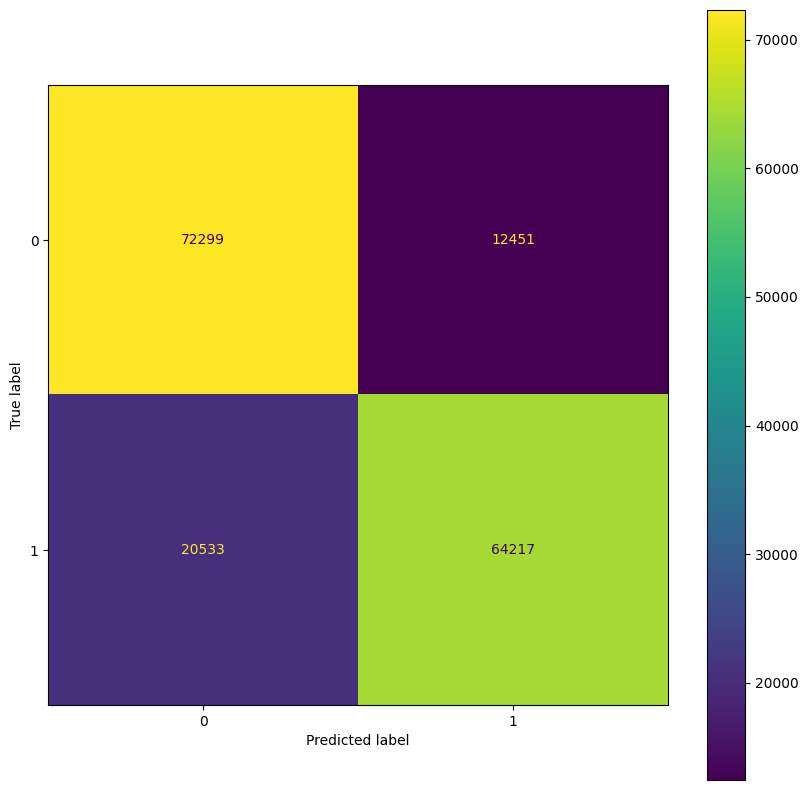

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.8054041297935104


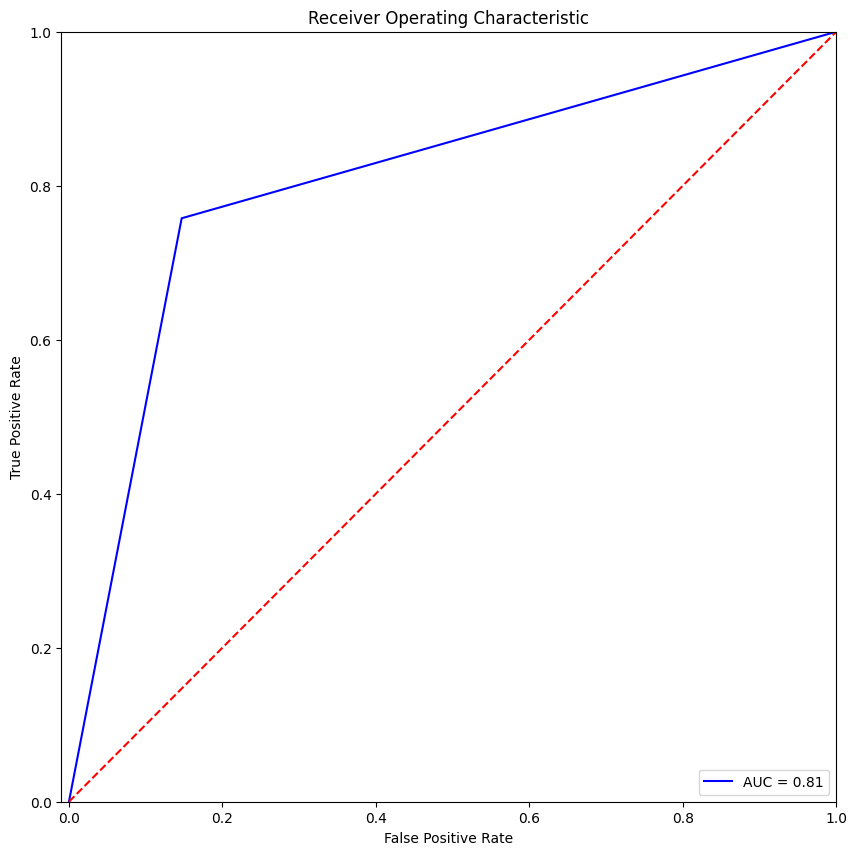

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [ ]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88    105210
           1       0.74      0.98      0.84     64290

    accuracy                           0.86    169500
   macro avg       0.86      0.89      0.86    169500
weighted avg       0.89      0.86      0.86    169500



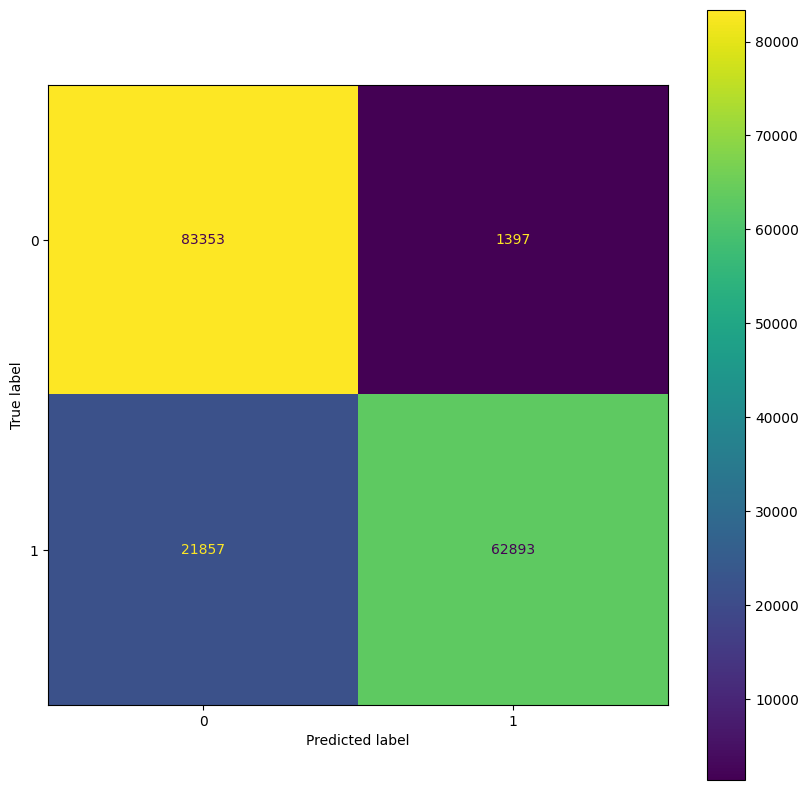

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(model, X_cv, y_cv, ax = ax)
plt.show()